# Import Libraries

In [63]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import rcParams
from scipy import stats

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Import Dataset

In [64]:
hotel=pd.read_csv('hotel_bookings.csv')

In [65]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.00000,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,nan,nan,0,Transient,0.00000,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.00000,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,nan,nan,0,Transient,0.00000,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.00000,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,nan,nan,0,Transient,75.00000,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.00000,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.00000,nan,0,Transient,75.00000,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.00000,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.00000,nan,0,Transient,98.00000,0,1,Check-Out,2015-07-03


In [66]:
#Total number of rows and columns
print('Total number of rows:',hotel.shape[0],'\nTotal number of columns:',hotel.shape[1])

Total number of rows: 119390 
Total number of columns: 32


In [67]:
hotel.info() #few features seems to have missing values. Let's verify

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [68]:
#features having missing values
hotel.isna().sum().sort_values(ascending=False).head(4)

company     112593
agent        16340
country        488
children         4
dtype: int64

In [69]:
#percentage of missing values
hotel.isna().sum().sort_values(ascending=False).head(4)/hotel.shape[0]*100

company    94.30689
agent      13.68624
country     0.40874
children    0.00335
dtype: float64

In [70]:
#Another way of percentage of missing values
hotel.isna().sum()[hotel.isna().sum()>0]

children         4
country        488
agent        16340
company     112593
dtype: int64

In [71]:
hotel.groupby(['hotel','country'])['company'].count()

hotel         country
City Hotel    ABW         0
              AGO        10
              AIA         0
              ALB         2
              AND         0
                         ..
Resort Hotel  VEN         0
              VNM         0
              ZAF         0
              ZMB         0
              ZWE         0
Name: company, Length: 291, dtype: int64

In [72]:
#As company has around 94% missing values. we can check if there is any scope of categorizing the data on the basis of company
print(hotel[~hotel.company.isnull()])
print(hotel.company.unique()) #As number of unique values are very large in numbers so,no point of categorizing
#Inference:we can drop this feature
hotel=hotel.drop('company',axis=1)


               hotel  is_canceled  lead_time  arrival_date_year  \
18      Resort Hotel            0          0               2015   
218     Resort Hotel            1          1               2015   
219     Resort Hotel            1          1               2015   
220     Resort Hotel            0          1               2015   
295     Resort Hotel            0         84               2015   
...              ...          ...        ...                ...   
119119    City Hotel            0         40               2017   
119122    City Hotel            0         40               2017   
119123    City Hotel            0         40               2017   
119124    City Hotel            0          0               2017   
119248    City Hotel            0         22               2017   

       arrival_date_month  arrival_date_week_number  \
18                   July                        27   
218                  July                        28   
219                  July     

In [73]:
hotel.agent.unique() 
#Dropping agent feature as it is an id and 13% of the data is missing 
hotel=hotel.drop('agent',axis=1)

In [74]:
# Dropping reservation_status and reservation_status_date feature
#hotel=hotel.drop(['reservation_status','reservation_status_date'],axis=1)

In [75]:
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.00000,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00000,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.00000,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00000,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.00000,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00000,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.00000,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00000,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.00000,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00000,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.00000,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14000,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.00000,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43000,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.00000,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71000,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.00000,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40000,0,0,Check-Out,2017-09-07


In [76]:
hotel.reservation_status.unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [77]:
hotel.reservation_status_date.unique()

array(['2015-07-01', '2015-07-02', '2015-07-03', '2015-05-06',
       '2015-04-22', '2015-06-23', '2015-07-05', '2015-07-06',
       '2015-07-07', '2015-07-08', '2015-05-11', '2015-07-15',
       '2015-07-16', '2015-05-29', '2015-05-19', '2015-06-19',
       '2015-05-23', '2015-05-18', '2015-07-09', '2015-06-02',
       '2015-07-13', '2015-07-04', '2015-06-29', '2015-06-16',
       '2015-06-18', '2015-06-12', '2015-06-09', '2015-05-26',
       '2015-07-11', '2015-07-12', '2015-07-17', '2015-04-15',
       '2015-05-13', '2015-07-10', '2015-05-20', '2015-05-12',
       '2015-07-14', '2015-06-17', '2015-05-01', '2015-03-30',
       '2015-07-19', '2015-06-03', '2015-06-26', '2015-05-14',
       '2015-07-20', '2015-05-07', '2015-05-28', '2015-04-13',
       '2015-03-25', '2015-07-21', '2015-06-27', '2015-07-18',
       '2015-07-23', '2015-06-08', '2015-06-22', '2015-06-24',
       '2015-03-05', '2015-06-01', '2015-04-24', '2015-07-22',
       '2015-05-27', '2015-04-06', '2015-04-11', '2015-

In [78]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# check if data is balance or not

In [79]:
hotel.is_canceled.value_counts()/hotel.shape[0]

0   0.62958
1   0.37042
Name: is_canceled, dtype: float64

In [80]:
# Alternatively,
# hotel.groupby('is_canceled').size()/hotel.shape[0]

In [81]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

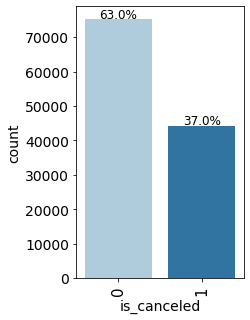

In [82]:
labeled_barplot(hotel, "is_canceled", perc=True) #slight imbalance

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

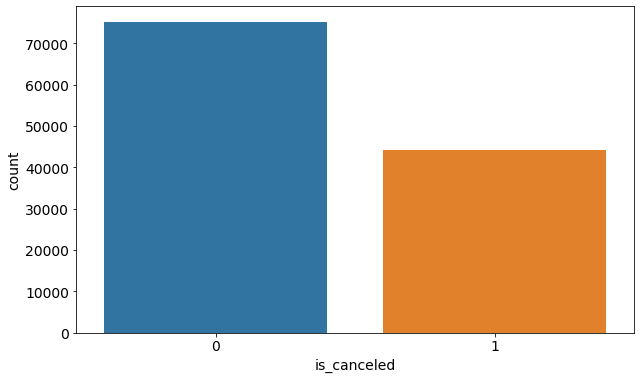

In [83]:
sns.countplot(hotel.is_canceled)

For any imbalanced data set, if the event to be predicted belongs to the minority class and the event rate is less than 5%, 
it is usually referred to as a rare event.

In [84]:
print(hotel.duplicated().sum())    
#If we drop duplicate rows,let's check the imbalance
hotel=hotel.drop_duplicates(keep='first')
print(hotel)

32020
               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    Jul

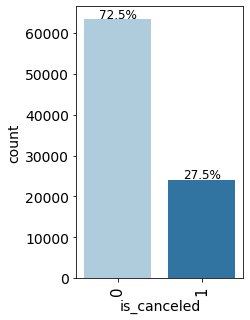

In [85]:
labeled_barplot(hotel, "is_canceled", perc=True) #imbalance has increased after dropping duplicate rows

## for comparison of model performance
## Hotel1=hotel.copy()

# Exploratory Data Analysis

In [86]:
hotel1=hotel.copy() 

In [87]:
hotel1.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,87370.00000,0.27493,0.44648,0.00000,0.00000,0.00000,1.00000,1.00000
lead_time,87370.00000,79.90060,86.05509,0.00000,11.00000,49.00000,125.00000,737.00000
arrival_date_year,87370.00000,2016.21031,0.68608,2015.00000,2016.00000,2016.00000,2017.00000,2017.00000
arrival_date_week_number,87370.00000,26.83855,13.67419,1.00000,16.00000,27.00000,37.00000,53.00000
arrival_date_day_of_month,87370.00000,15.81597,8.83522,1.00000,8.00000,16.00000,23.00000,31.00000
stays_in_weekend_nights,87370.00000,1.00541,1.03198,0.00000,0.00000,1.00000,2.00000,19.00000
stays_in_week_nights,87370.00000,2.62560,2.05369,0.00000,1.00000,2.00000,4.00000,50.00000
adults,87370.00000,1.87587,0.62652,0.00000,2.00000,2.00000,2.00000,55.00000
children,87366.00000,0.13868,0.45594,0.00000,0.00000,0.00000,0.00000,10.00000
babies,87370.00000,0.01080,0.11351,0.00000,0.00000,0.00000,0.00000,10.00000


1. The records are drawn from the year 2015,2016 and 2017 i.e for 3 years
2. Most of the people in weekend nights are staying for one weekend night.
3. Most of the people are spending more nights in week than nights in weekend.
4. Mostly couples came to the hotel. It might be for the honeymoon.
5. Very few groups came to the hotel
6. Very few visitors brought children with them. We saw an unusual case where visitor came with 10 children.
7. Surprisingly,There was a single instance where some people brought 10 babies to the the hotel.
8. It seems there are very less number of repeated guests
9. There are very few number of previous cancellations. There is an extreme case of 26 previous cancellations.
10. There is one instance where a visitor was quite unsure about the booking
11. There is a case where the booking was not confirmed for more than an year.
12. It was quite surprising in one of the case where average daily rate for transient party came out to be negative.It seems to be an unusual case of loss to the hotel or a glitch in extracting the data
13. Most of the visitors require only one car parking space. However, there was an extreme case where parking space for 8 cars were required.
14. There were very few special requests made by the visitors

In [88]:
#Checking for any previously done SMOTE minority sampling .
hotel1[hotel1.days_in_waiting_list==391]
#Inference: It seems like SMOTE/MSMOTE sampling has been performed in the data previously

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
58152,City Hotel,1,443,2016,October,41,7,0,2,2,0.00000,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,391,Transient,65.00000,0,0,Canceled,2016-09-20
59076,City Hotel,1,457,2016,October,43,21,0,2,2,0.00000,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,391,Transient,65.00000,0,0,Canceled,2016-09-20
59085,City Hotel,1,457,2016,October,43,21,0,2,2,0.00000,0,BB,PRT,Groups,TA/TO,0,0,0,A,B,1,Non Refund,391,Transient,65.00000,0,0,Canceled,2016-09-20
59395,City Hotel,1,464,2016,October,44,28,0,2,2,0.00000,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,391,Transient,65.00000,0,0,Canceled,2016-09-20
59450,City Hotel,1,464,2016,October,44,28,0,2,2,0.00000,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,2,Non Refund,391,Transient,65.00000,0,0,Canceled,2016-09-20


As seen in the above case, the minority class has been up-sampled/synthetically sampled before being received by us. It might be due to following reasons:
1. we found many duplicate observations in the data which we dropped in the initial data cleaning process to avoid overfitting.
2. we found many synthetic observations(repeated but not duplicated) in the data

In [89]:
#hotel.days_in_waiting_list.value_counts()

In [90]:
hotel1[['children','babies']].corr()

,children,babies
children,1.00000,0.01749
babies,0.01749,1.00000


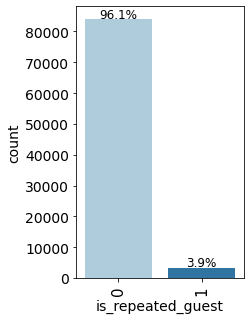

In [91]:
labeled_barplot(hotel1, "is_repeated_guest", perc=True) #imbalance has increased after dropping duplicate rows

In [92]:
hotel1[(hotel.previous_cancellations>0) | (hotel.previous_bookings_not_canceled>0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
13803,Resort Hotel,0,7,2016,January,3,13,0,2,1,0.00000,0,BB,NaN,Corporate,Corporate,0,0,1,A,D,0,No Deposit,0,Transient,27.00000,0,0,Check-Out,2016-01-15
13804,Resort Hotel,0,7,2016,January,4,18,1,3,1,0.00000,0,BB,NaN,Corporate,Corporate,0,0,2,A,A,0,No Deposit,0,Transient,28.50000,1,0,Check-Out,2016-01-22
13805,Resort Hotel,1,2,2016,October,42,12,0,2,1,0.00000,0,BB,NaN,Corporate,Corporate,0,1,3,A,A,0,No Deposit,0,Transient,37.00000,0,0,Canceled,2016-10-10
13808,Resort Hotel,0,6,2016,January,5,26,0,2,1,0.00000,0,BB,PRT,Corporate,Corporate,0,0,1,A,D,1,No Deposit,0,Transient,27.00000,0,0,Check-Out,2016-01-28
13811,Resort Hotel,1,71,2016,July,29,14,3,8,2,0.00000,0,HB,NaN,Direct,Direct,0,1,1,E,E,1,No Deposit,0,Transient,126.60000,0,1,Canceled,2016-07-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117424,City Hotel,0,3,2017,August,35,31,0,1,2,1.00000,0,BB,PRT,Corporate,Corporate,1,0,1,A,A,0,No Deposit,0,Transient,95.00000,0,4,Check-Out,2017-09-01
117841,City Hotel,0,7,2017,August,35,30,0,2,1,0.00000,0,BB,PRT,Corporate,Corporate,1,0,1,A,A,0,No Deposit,0,Transient,65.00000,0,2,Check-Out,2017-09-01
118581,City Hotel,0,11,2017,August,34,25,0,2,2,0.00000,0,BB,FRA,Offline TA/TO,TA/TO,0,0,1,D,D,1,No Deposit,0,Group,125.00000,0,0,Check-Out,2017-08-27
118651,City Hotel,0,189,2017,August,35,27,2,0,2,0.00000,0,BB,ITA,Online TA,TA/TO,0,0,1,A,A,1,No Deposit,0,Transient-Party,119.00000,0,3,Check-Out,2017-08-29


In [93]:
#Check whether data types are correctly mentioned or not
list(hotel1.select_dtypes(include=object))


['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [94]:
list(hotel1.select_dtypes(include=np.number))

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

is_canceled,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,is_repeated_guest are categorical columns.Let's convert it into object datatype

In [95]:
hotel1['is_canceled']=hotel1.is_canceled.astype(object)
hotel1['arrival_date_year']=hotel1.arrival_date_year.astype(object)
hotel1['arrival_date_week_number']=hotel1.arrival_date_week_number.astype(object)
hotel1['arrival_date_day_of_month']=hotel1.arrival_date_day_of_month.astype(object)
hotel1['is_repeated_guest']=hotel1.is_repeated_guest.astype(object)

In [96]:
hotel1.select_dtypes(include=object)

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,0,2015,July,27,1,BB,PRT,Direct,Direct,0,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,0,2015,July,27,1,BB,PRT,Direct,Direct,0,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,0,2015,July,27,1,BB,GBR,Direct,Direct,0,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,0,2015,July,27,1,BB,GBR,Corporate,Corporate,0,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,0,2015,July,27,1,BB,GBR,Online TA,TA/TO,0,A,A,No Deposit,Transient,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,2017,August,35,30,BB,BEL,Offline TA/TO,TA/TO,0,A,A,No Deposit,Transient,Check-Out,2017-09-06
119386,City Hotel,0,2017,August,35,31,BB,FRA,Online TA,TA/TO,0,E,E,No Deposit,Transient,Check-Out,2017-09-07
119387,City Hotel,0,2017,August,35,31,BB,DEU,Online TA,TA/TO,0,D,D,No Deposit,Transient,Check-Out,2017-09-07
119388,City Hotel,0,2017,August,35,31,BB,GBR,Online TA,TA/TO,0,A,A,No Deposit,Transient,Check-Out,2017-09-07


## Univariate Analysis

### Categorical Columns

In [97]:
#All the columns which can be interpreted as category
cat_cols1=hotel1[['hotel','is_canceled',
 'arrival_date_year','arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel','is_repeated_guest',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date','stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies','previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes','required_car_parking_spaces',
 'total_of_special_requests','days_in_waiting_list']]

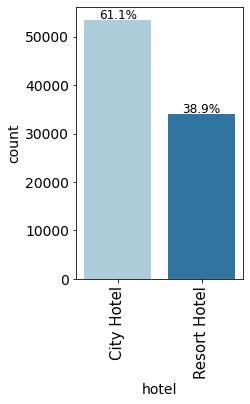

In [98]:
labeled_barplot(cat_cols1, 'hotel', perc=True)

There are larger number of city hotels than the resort hotels (ratio around 3:2)

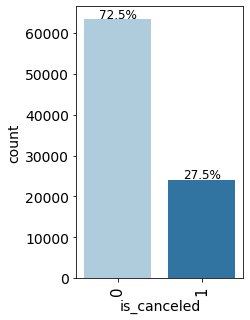

In [99]:
labeled_barplot(cat_cols1, 'is_canceled', perc=True)

Most of the bookings were not cancelled

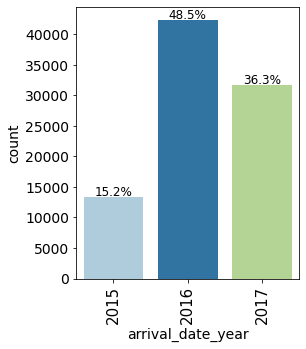

In [100]:
labeled_barplot(cat_cols1, 'arrival_date_year', perc=True)

Most of the bookings were in 2016 followed by 2017 and 2015

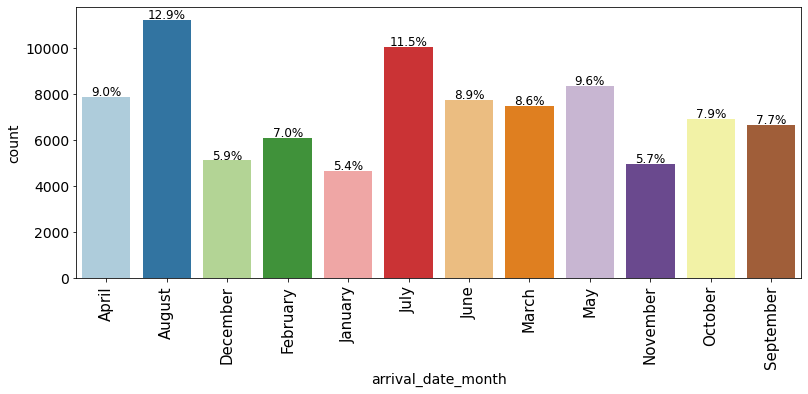

In [101]:
labeled_barplot(cat_cols1, 'arrival_date_month', perc=True)

1. More number of people prefer to visit during July and August.
2. November,December and january seems to be the off season where around 5% people prefer to visit.

<AxesSubplot:xlabel='arrival_date_day_of_month', ylabel='count'>

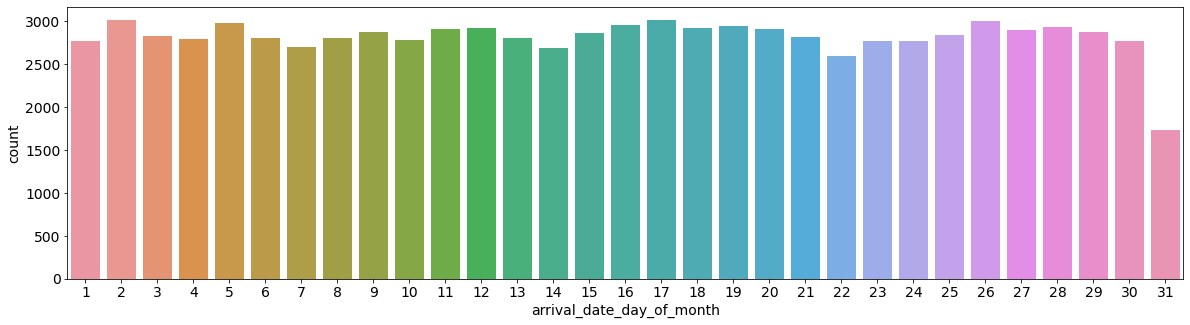

In [102]:
rcParams['figure.figsize'] = 20,5
sns.countplot(x='arrival_date_day_of_month',data=cat_cols1)

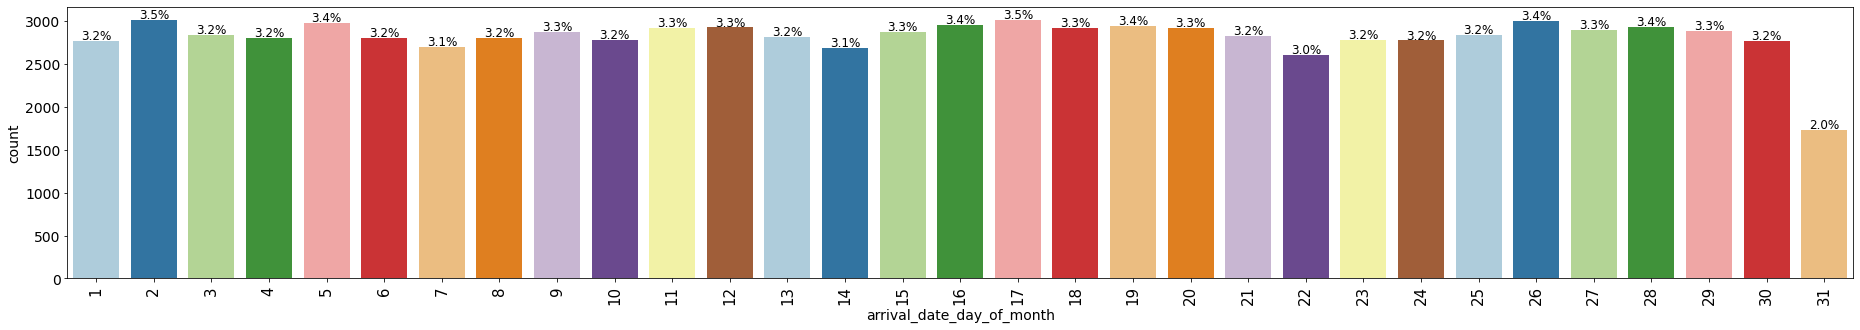

In [103]:
labeled_barplot(cat_cols1,'arrival_date_day_of_month', perc=True)

Slightly less percentage of people arrived to the hotel on 31st.

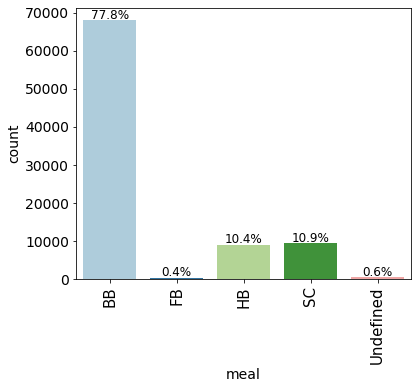

In [104]:
labeled_barplot(cat_cols1,'meal', perc=True)

1. Most of the people prefer breakfast only in their meal plan
2. There are very few cases where meal plan is not defined. We can fit them in relevent meal plan.
3. There are very few cases where people chose Full Board i.e Breakfast,Lunch as well Dinner around 0.4%

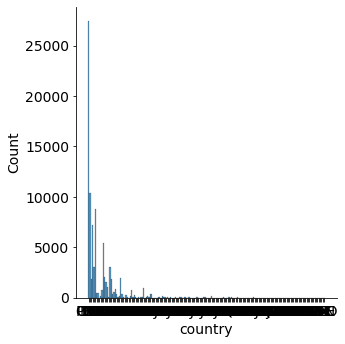

In [105]:
sns.displot(hotel1,x='country')

In [106]:
hotel1.country.value_counts()

PRT    27440
GBR    10431
FRA     8837
ESP     7250
DEU     5385
ITA     3065
IRL     3016
BEL     2081
BRA     1993
NLD     1911
USA     1875
CHE     1570
CN      1093
AUT      946
SWE      837
CHN      814
POL      765
RUS      561
NOR      514
ROU      458
FIN      422
ISR      403
DNK      384
AUS      378
AGO      342
LUX      262
MAR      232
TUR      213
ARG      203
HUN      202
JPN      183
IND      143
CZE      136
KOR      119
GRC      117
HRV       91
DZA       82
IRN       80
EST       79
ZAF       78
MEX       74
LTU       73
COL       69
BGR       68
CHL       65
NZL       63
UKR       62
MOZ       56
SRB       54
LVA       51
ARE       48
SVK       48
SAU       45
CYP       45
SVN       44
TWN       43
THA       40
TUN       37
SGP       34
PHL       32
EGY       31
NGA       30
URY       30
LBN       29
ISL       26
PER       26
ECU       25
IDN       25
BLR       24
MYS       24
HKG       23
CPV       23
VEN       21
KAZ       19
JOR       19
GEO       19
CRI       18

Most of the bookings were made from Portugal followed by United Kingdom and France.

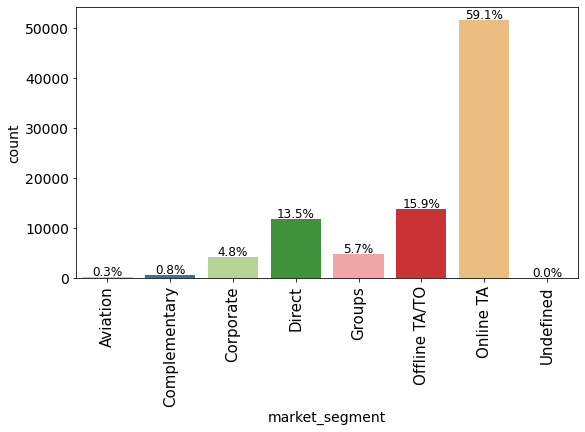

In [107]:
labeled_barplot(cat_cols1,'market_segment', perc=True)

1. Most of the people booked online through Travel Agent(for instance: MakeMyTrip)
2. Very few cases of booking for the hotel by Aviation company.Sometimes Travel as well as Accommodation are included in their package.
3. There are very few cases where visitors were offered free stays at the hotel
4. A small number of entries for market_segment is not defined.We can fill them during our missing value analysis

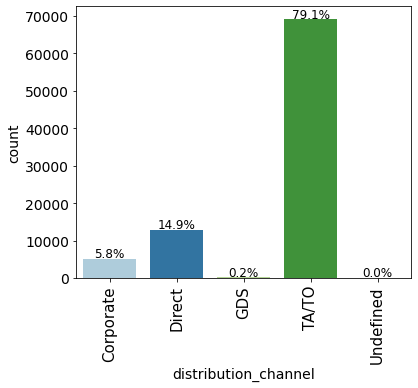

In [108]:
labeled_barplot(cat_cols1,'distribution_channel', perc=True)

distribution_channel and market_segment seems to convey similar information. We can drop one of them to avoid multicollinearity.

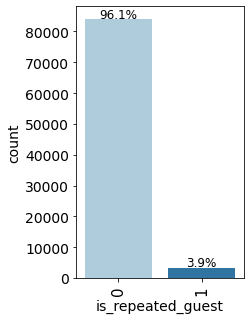

In [109]:
labeled_barplot(cat_cols1,'is_repeated_guest', perc=True)

There are very few cases of repeated visitors who made the booking. Otherwise mostly people booked for the first time to the hotel

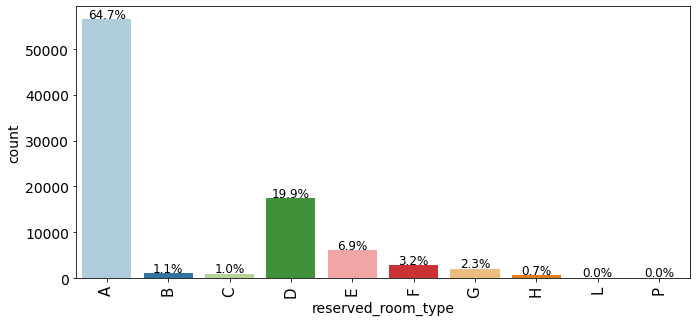

In [110]:
labeled_barplot(cat_cols1,'reserved_room_type', perc=True)

Around 64.7% of the customers booked room type A. It is the most demanded room type followed by D.

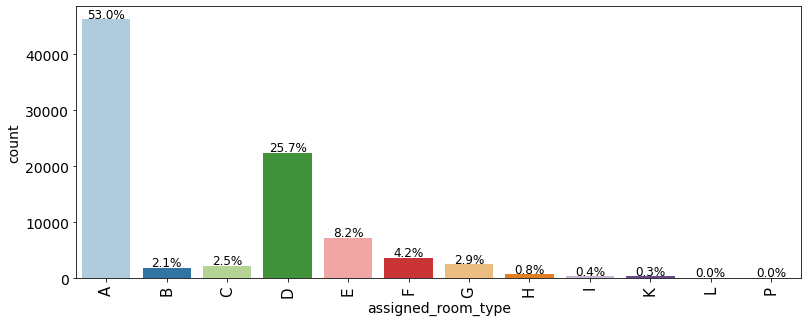

In [111]:
labeled_barplot(cat_cols1,'assigned_room_type', perc=True)

1. Around 53% bookings were assigned room type A.
2. 11.7% of the customers who opted for room type A were assigned another room type due to high chances of unavailability of room type A.

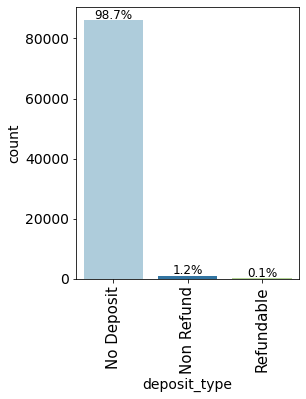

In [112]:
labeled_barplot(cat_cols1,'deposit_type', perc=True)

Around 98.7% people made no deposit to guarantee their booking.

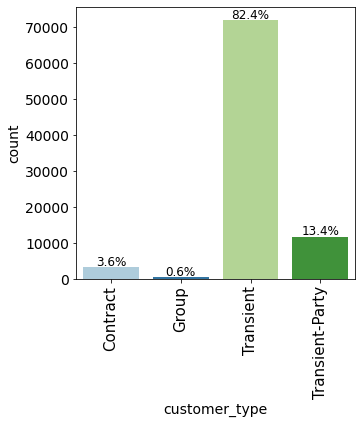

In [113]:
labeled_barplot(cat_cols1,'customer_type', perc=True)

Most of the bookings(around 82.4%) are Transient(customers who made last minute booking or came for short stays at the hotel) followed by Transient party.

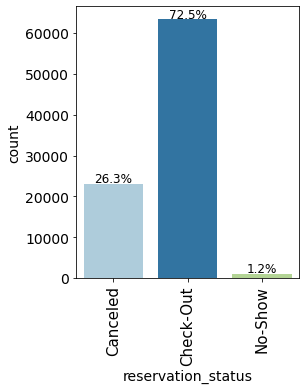

In [114]:
labeled_barplot(cat_cols1,'reservation_status', perc=True)

1. Most of the bookings were not cancelled(around 72.5%)
2. Very few number of bookings were No-Show i.e customers did not check in to the hotel and also informed the reason.

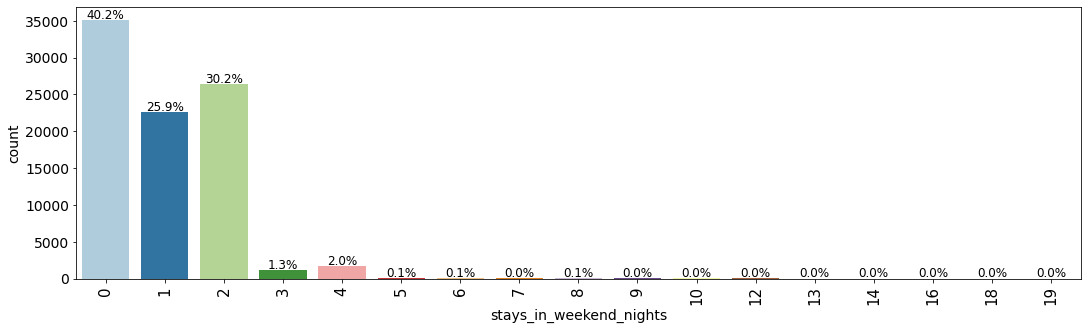

In [115]:
labeled_barplot(cat_cols1,'stays_in_weekend_nights', perc=True)

1. Around 40% visitors did not plan to spend weekend on the hotel
2. customers planning to spend 1 or 2 weekends are almost comparable

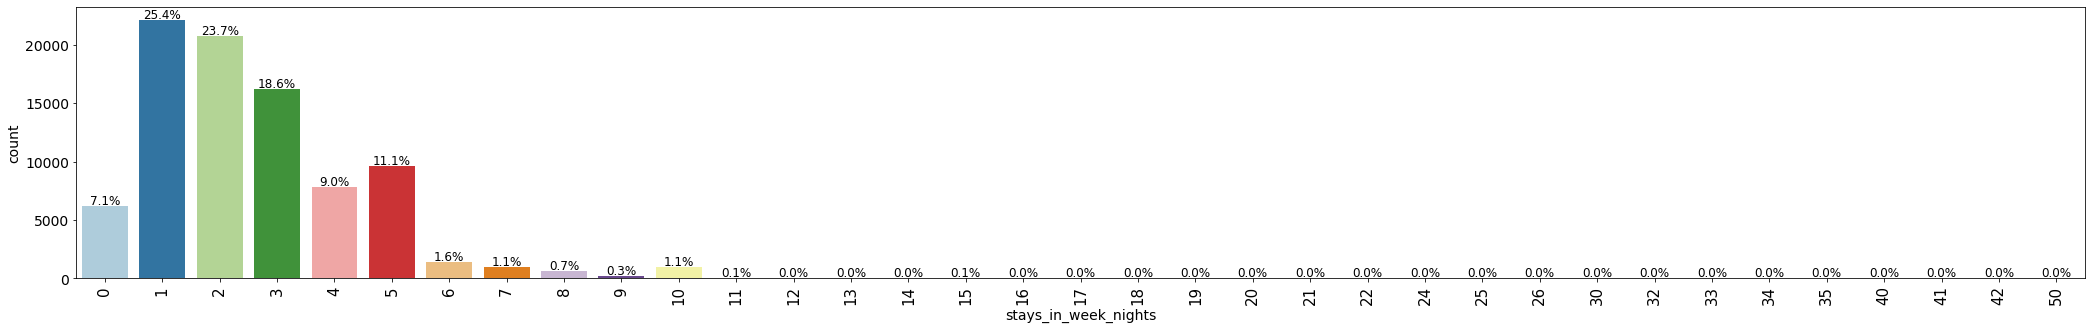

In [116]:
labeled_barplot(cat_cols1,'stays_in_week_nights', perc=True)

In [117]:
#As the plot is unclear so either we can trim the unnecessary part or pick only those days where values are significant
hh=list(hotel1.stays_in_week_nights.value_counts().head(11).index)

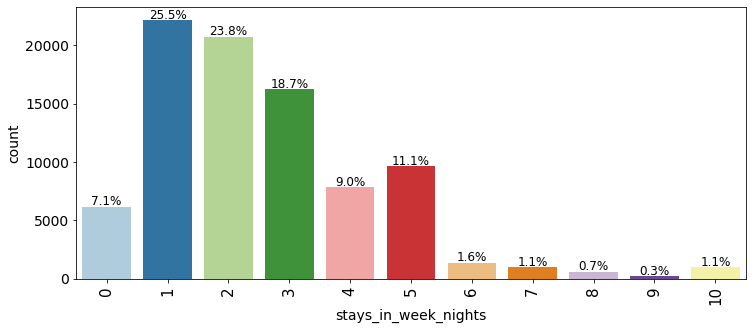

In [118]:
labeled_barplot(hotel1[hotel1.stays_in_week_nights.isin(hh)],'stays_in_week_nights', perc=True)

1. Around 25.5% customers planned to visit for single night during weekdays followed by 23.8% customers for two nights

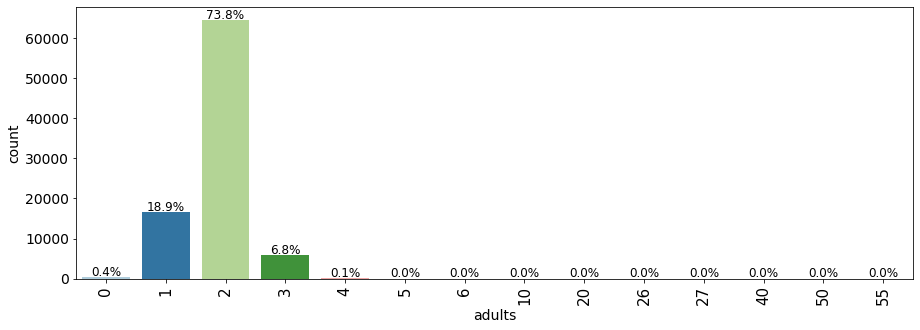

In [119]:
labeled_barplot(cat_cols1,'adults', perc=True)

1. Mostly 2 adults planned to visit the hotel.They are likely to be couples


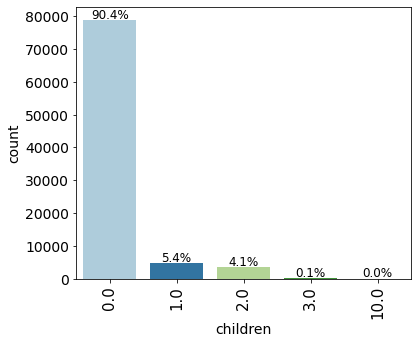

In [120]:
labeled_barplot(cat_cols1,'children', perc=True)

Around 90% customers did not plan to bring their children

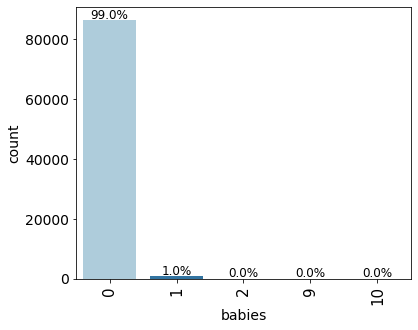

In [121]:
labeled_barplot(cat_cols1,'babies', perc=True)

Very few customers brought their babies with them

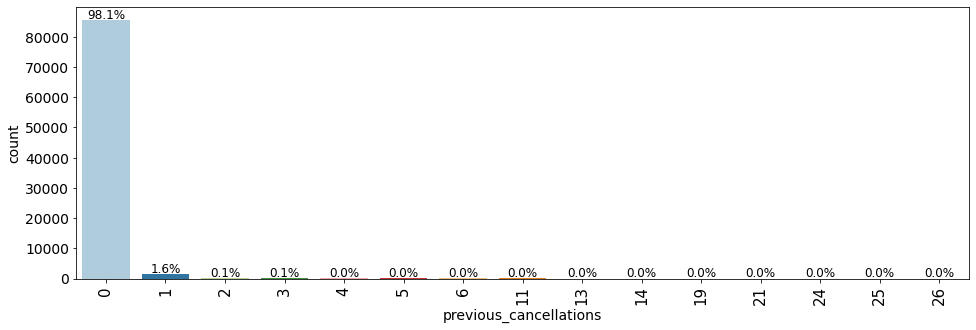

In [122]:
labeled_barplot(cat_cols1,'previous_cancellations', perc=True)

Mostly customers did not cancel their bookings prior to the current booking

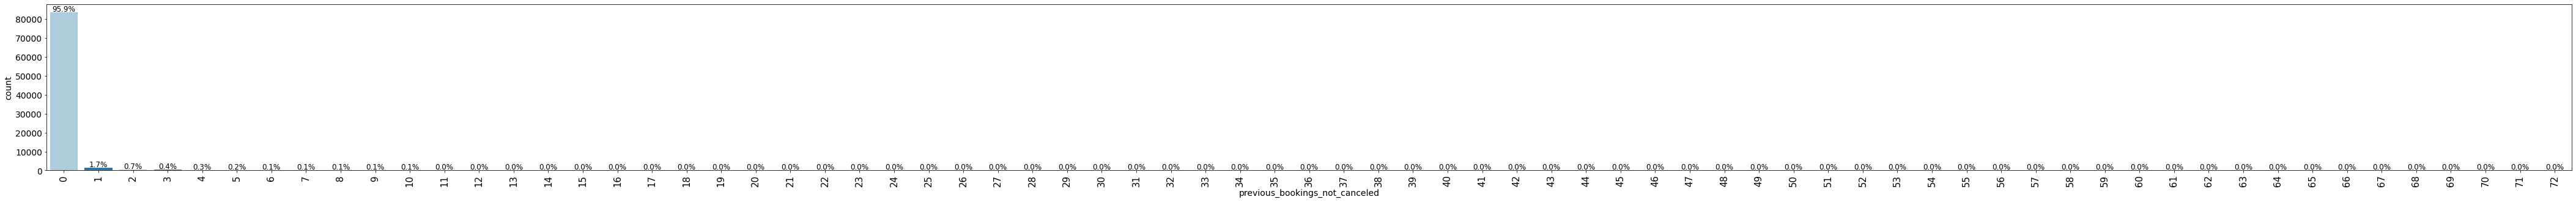

In [123]:
labeled_barplot(cat_cols1,'previous_bookings_not_canceled', perc=True)

In [124]:
hh1=list(hotel1.previous_bookings_not_canceled.value_counts().head(10).index)

In [125]:
hh1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

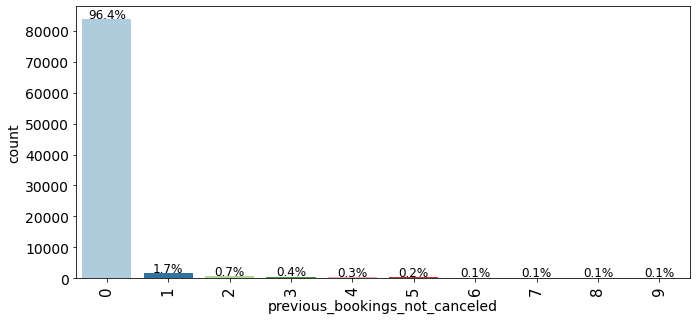

In [126]:
labeled_barplot(hotel1[hotel1.previous_bookings_not_canceled.isin(hh1)],'previous_bookings_not_canceled', perc=True)

Mostly number of bookings(around 96.4%) are not cancelled by the customer prior to the current booking

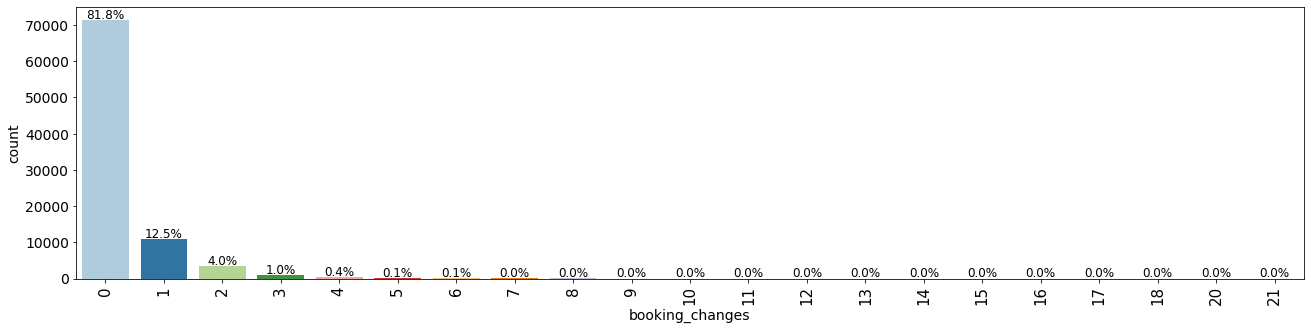

In [127]:
labeled_barplot(cat_cols1,'booking_changes', perc=True)

Mostly customers did not make any amendments in their bookings

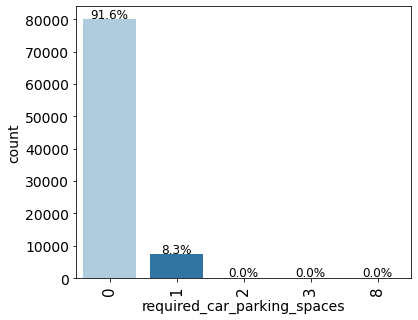

In [128]:
labeled_barplot(cat_cols1,'required_car_parking_spaces', perc=True)

1. Mostly customers did not require any parking spaces
2. Around 8.3% customers require one parking spaces

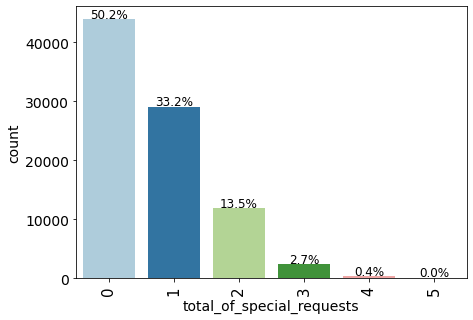

In [129]:
labeled_barplot(cat_cols1,'total_of_special_requests', perc=True)

1. Around half of the bookings do not have any special requests
2. Around one-third of bookings have one special request

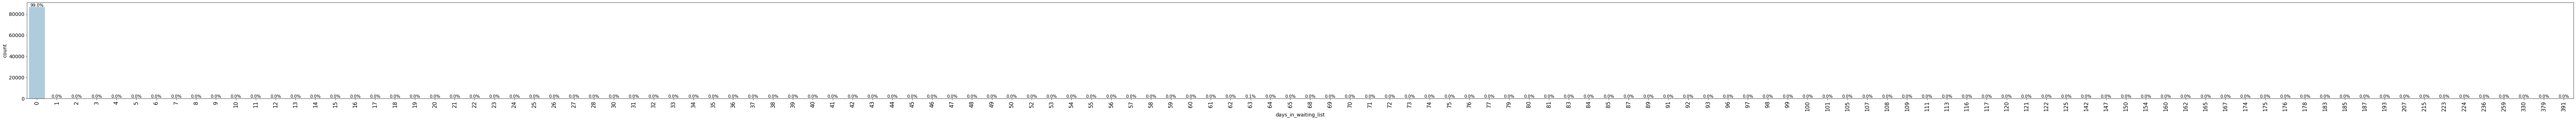

In [130]:
labeled_barplot(cat_cols1,'days_in_waiting_list', perc=True)

In [131]:
hh2=list(hotel1.days_in_waiting_list.value_counts().head(10).index)

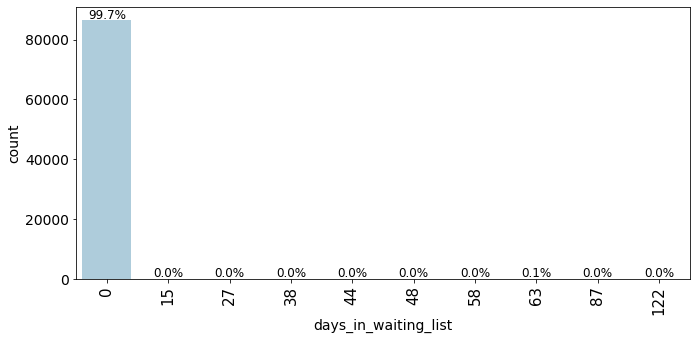

In [132]:
labeled_barplot(hotel1[hotel1.days_in_waiting_list.isin(hh2)],'days_in_waiting_list', perc=True)

1. Around 99.7% bookings were booked instantly by the hotel

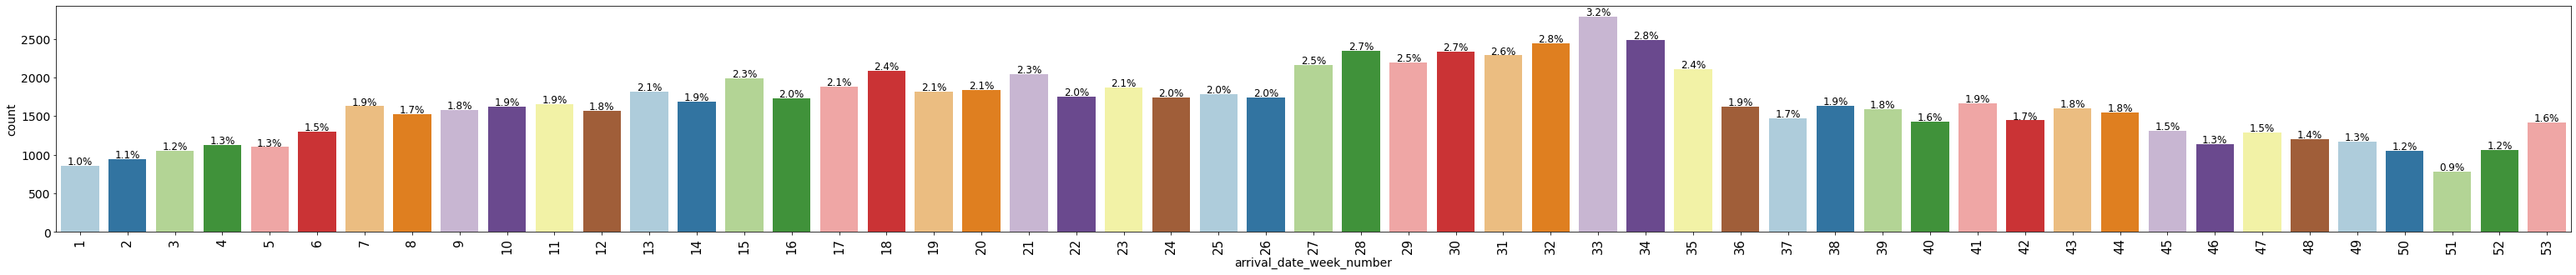

In [133]:
labeled_barplot(cat_cols1,'arrival_date_week_number', perc=True)

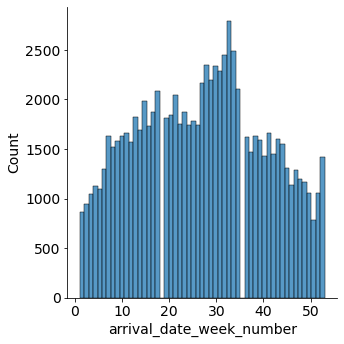

In [134]:
sns.displot(hotel,x='arrival_date_week_number')

In [135]:
hotel.arrival_date_week_number.skew()

0.022538818364729842

More number of bookings were made between 35th and 40th week

### Numerical Columns

In [136]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

Lead time and Average Daily Rate are the numerical columns

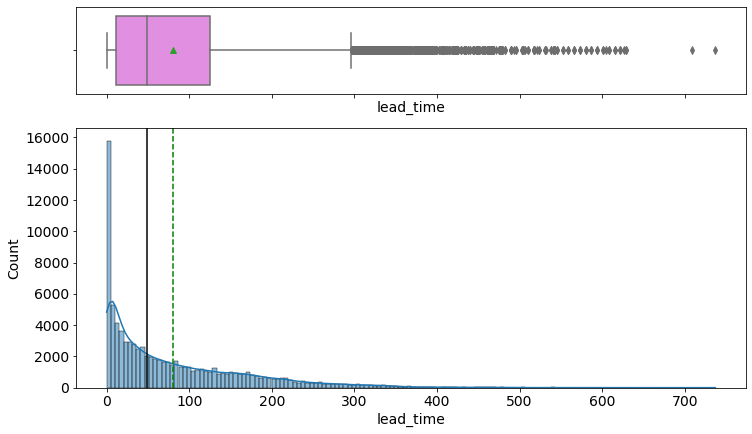

In [137]:

histogram_boxplot(hotel1,'lead_time',kde=True)

1.There are large number of outliers above the upper whisker.That's why mean has shifted towards right
2.The Distribution is skewed to the right
3.Large number of people made their booking on the same day of arrival


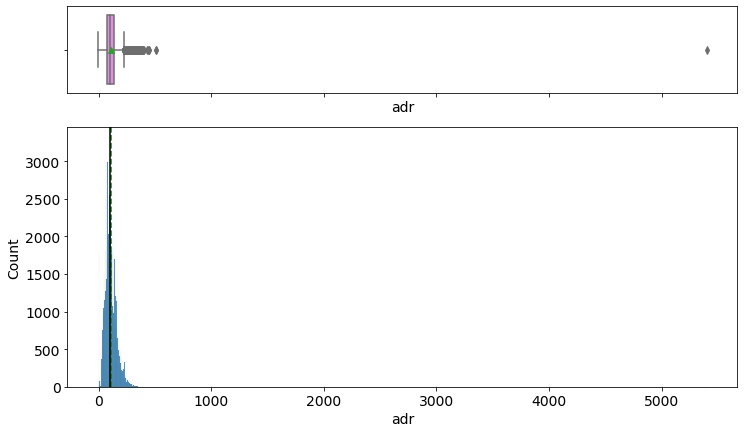

In [138]:
histogram_boxplot(hotel1,'adr')

1.In a case, average daily rate is quite high
2.Distribution seems to be right skewed.Let's plot clearer representation of this plot by removing outliers

1. There are significant number of bookings where average daily rate is 0. These are complimentary bookings.


# Bivariate Analysis

<AxesSubplot:>

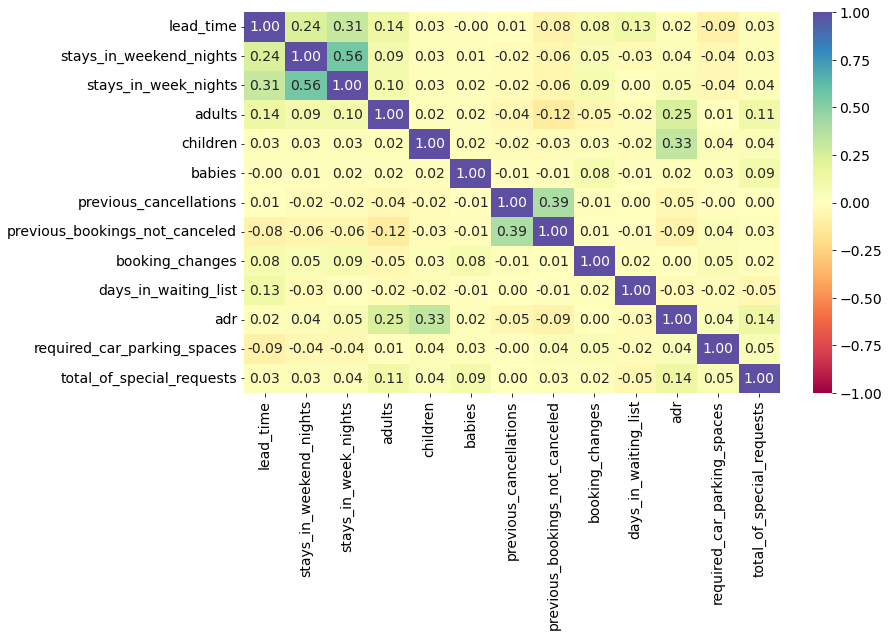

In [139]:
plt.figure(figsize=(12, 7))
sns.heatmap(hotel1.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

1. Number of stays in weekend nights and number of stays in weekday nights are moderate positively correlated 

### Independent variable v/s Target variable
1. hotel vs is_canceled-countplot
2. lead_time vs is_canceled- boxplot,barchart
3. arrival_date_year vs is_canceled-countplot
4. arrival_date_month vs is_canceled-countplot
5. arrival_date_week_number vs is_canceled- countplot
6. stays_in_weekend_nights vs is_canceled- countplot
7. stays_in_week_nights vs is_canceled - countplot
8. adults vs is_canceled - countplot
9. children vs is_canceled -countplot
10. babies vs is_canceled - countplot
11. meal vs is_canceled - countplot
12. market_segment vs is_canceled - countplot
13. distribution_channel vs is_canceled - countplot
14. is_repeated_guest vs is_canceled - countplot
15. previous cancellations vs is_canceled - countplot
16. previous_bookings_not_canceled vs is_canceled - countplot
17. previous_cancellations+previous_bookings_not_canceled vs is_Canceled- countplot
18. reserved_room_type vs is_canceled - countplot
19. assigned_room_type vs is_canceled - countplot
20. booking_changes vs is_canceled - countplot
21. deposit_type vs is_canceled -countplot
22. days_in_waiting_list vs is_canceled -countplot
23. customer_type vs is_canceled -countplot
24. adr vs is_canceled- boxplot
25. required_car_paarking_spaces vs is_canceled -countplot
26. total_of_special_requests vs is_canceled - countplot
27. reservation_status vs is_canceled- countplot


In [140]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [141]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize=False).sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

is_canceled       0      1    All
hotel                            
All           63349  24021  87370
City Hotel    37367  16047  53414
Resort Hotel  25982   7974  33956
------------------------------------------------------------------------------------------------------------------------


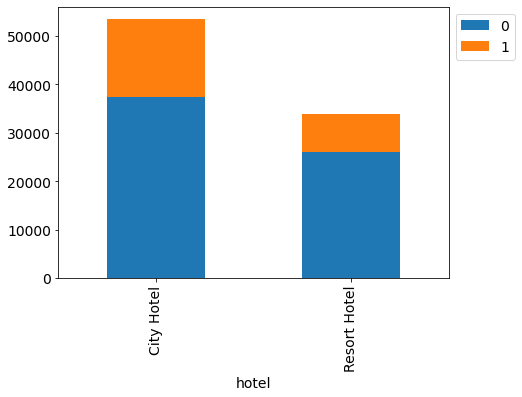

In [142]:
stacked_barplot(hotel1, "hotel", "is_canceled")

is_canceled            0      1    All
arrival_date_year                     
All                63349  24021  87370
2016               31174  11207  42381
2017               21570  10112  31682
2015               10605   2702  13307
------------------------------------------------------------------------------------------------------------------------


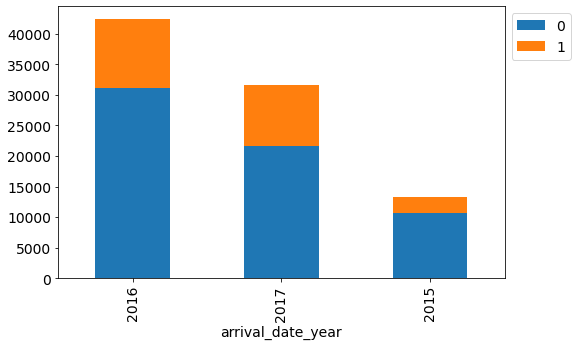

In [143]:
stacked_barplot(hotel1, "arrival_date_year", "is_canceled")

is_canceled             0      1    All
arrival_date_month                     
All                 63349  24021  87370
August               7633   3621  11254
July                 6855   3198  10053
May                  5911   2442   8353
April                5497   2409   7906
June                 5411   2353   7764
March                5681   1830   7511
October              5292   1642   6934
September            5046   1642   6688
February             4680   1415   6095
December             3751   1378   5129
November             3939   1053   4992
January              3653   1038   4691
------------------------------------------------------------------------------------------------------------------------


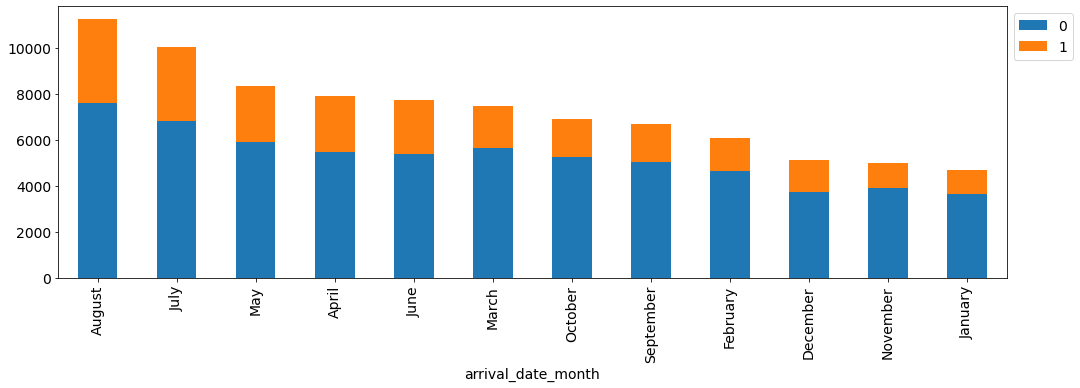

In [144]:
stacked_barplot(hotel1, "arrival_date_month", "is_canceled")

is_canceled                   0      1    All
arrival_date_week_number                     
All                       63349  24021  87370
33                         1870    923   2793
32                         1666    782   2448
34                         1715    775   2490
30                         1569    764   2333
28                         1595    748   2343
31                         1552    735   2287
18                         1376    712   2088
27                         1456    708   2164
29                         1516    681   2197
35                         1450    654   2104
15                         1372    617   1989
21                         1432    611   2043
25                         1230    556   1786
17                         1331    547   1878
26                         1202    537   1739
19                         1277    536   1813
16                         1205    531   1736
20                         1324    519   1843
23                         1354   

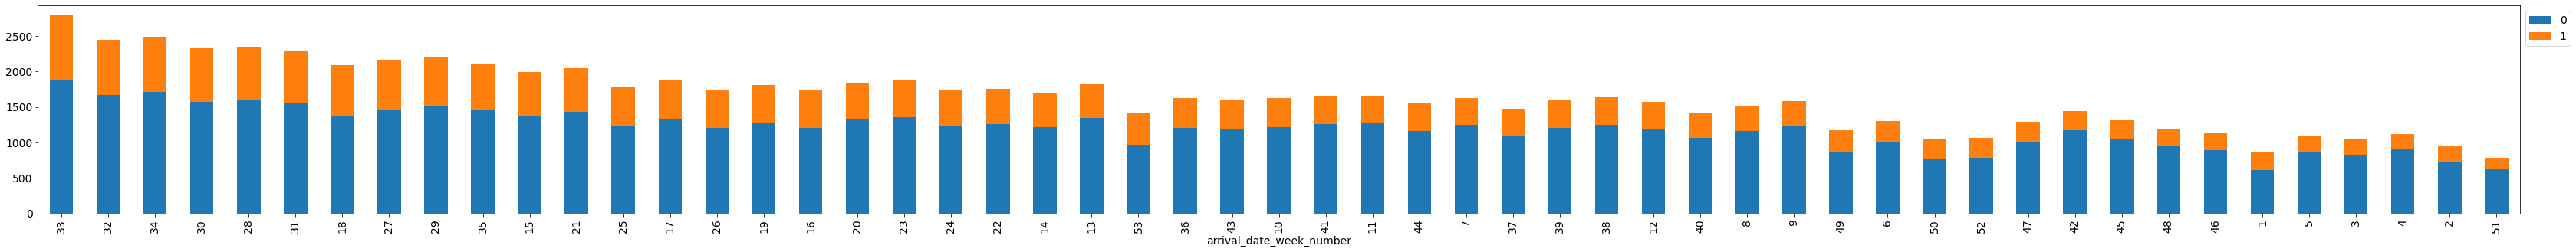

In [145]:
stacked_barplot(hotel1, "arrival_date_week_number", "is_canceled")

is_canceled         0      1    All
market_segment                     
All             63349  24021  87370
Online TA       33365  18244  51609
Offline TA/TO   11821   2060  13881
Direct          10065   1737  11802
Groups           3606   1335   4941
Corporate        3696    510   4206
Complementary     614     88    702
Aviation          182     45    227
Undefined           0      2      2
------------------------------------------------------------------------------------------------------------------------


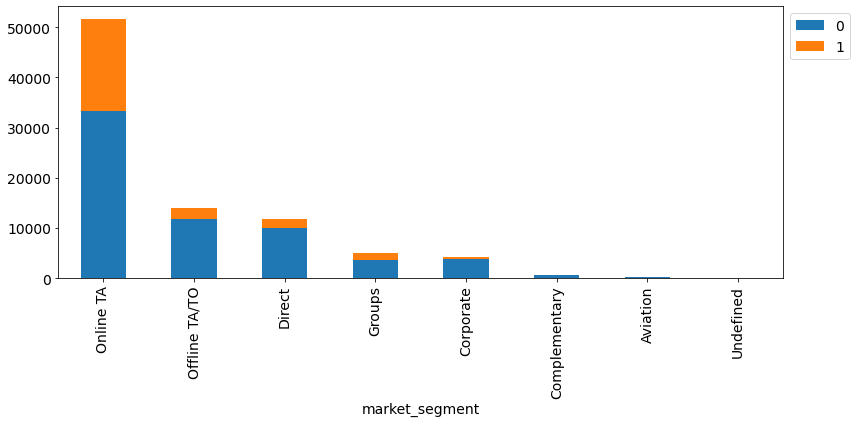

In [146]:
stacked_barplot(hotel1, "market_segment", "is_canceled")

group vs family bookings

is_canceled               0      1    All
distribution_channel                     
All                   63349  24021  87370
TA/TO                 47715  21408  69123
Direct                11061   1925  12986
Corporate              4427    648   5075
GDS                     145     36    181
Undefined                 1      4      5
------------------------------------------------------------------------------------------------------------------------


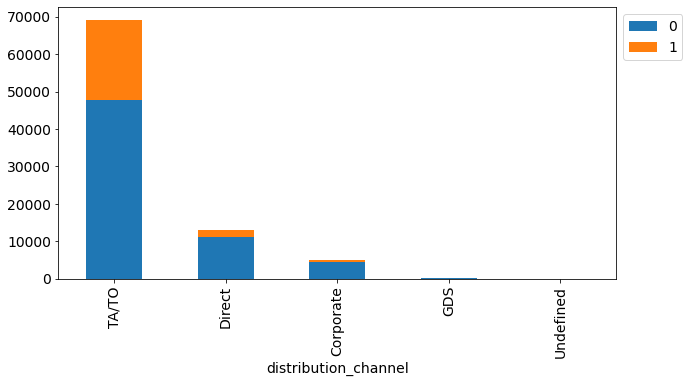

In [147]:
stacked_barplot(hotel1, "distribution_channel", "is_canceled")

is_canceled            0      1    All
is_repeated_guest                     
All                63349  24021  87370
0                  60195  23760  83955
1                   3154    261   3415
------------------------------------------------------------------------------------------------------------------------


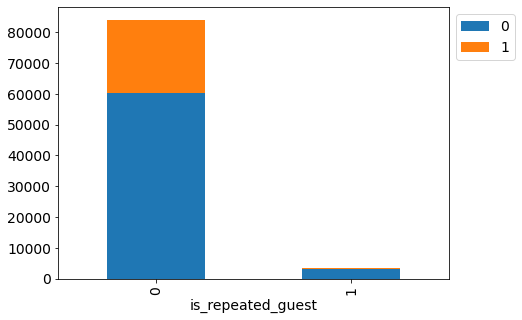

In [148]:
stacked_barplot(hotel1, "is_repeated_guest", "is_canceled")

is_canceled             0      1    All
reserved_room_type                     
All                 63349  24021  87370
A                   41845  14684  56529
D                   12162   5236  17398
E                    4398   1648   6046
F                    1972    851   2823
G                    1315    737   2052
B                     681    318    999
C                     619    296    915
H                     353    243    596
P                       0      6      6
L                       4      2      6
------------------------------------------------------------------------------------------------------------------------


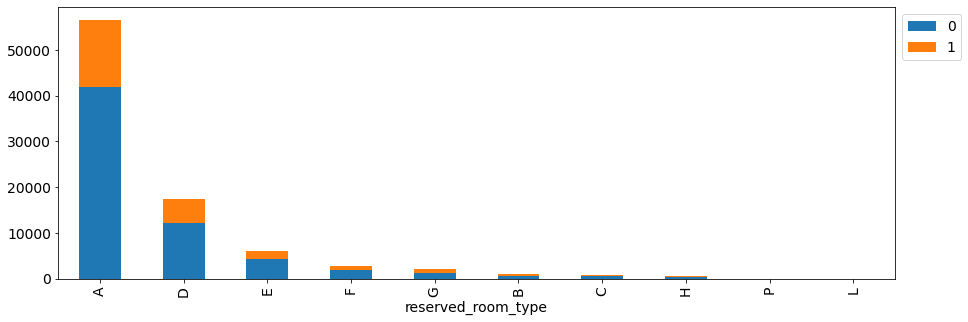

In [149]:
stacked_barplot(hotel1, "reserved_room_type", "is_canceled")

is_canceled             0      1    All
assigned_room_type                     
All                 63349  24021  87370
A                   32114  14179  46293
D                   16998   5431  22429
E                    5496   1697   7193
F                    2732    894   3626
G                    1745    753   2498
B                    1421    399   1820
C                    1770    395   2165
H                     457    249    706
K                     264     12    276
P                       0      6      6
I                     352      5    357
L                       0      1      1
------------------------------------------------------------------------------------------------------------------------


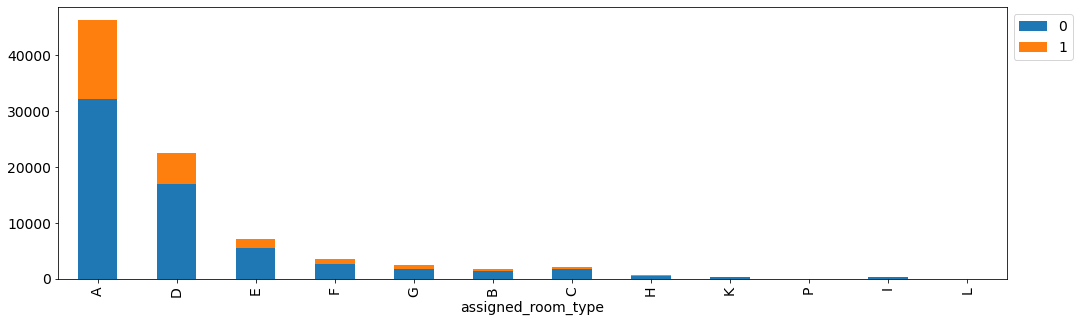

In [150]:
stacked_barplot(hotel1, "assigned_room_type", "is_canceled")

is_canceled          0      1    All
booking_changes                     
All              63349  24021  87370
0                49906  21564  71470
1                 9389   1511  10900
2                 2804    704   3508
3                  744    131    875
4                  293     63    356
5                   96     20    116
6                   42     17     59
8                   13      4     17
7                   28      3     31
9                    7      1      8
10                   5      1      6
14                   4      1      5
16                   1      1      2
18                   1      0      1
21                   1      0      1
20                   1      0      1
12                   2      0      2
17                   2      0      2
15                   3      0      3
13                   5      0      5
11                   2      0      2
----------------------------------------------------------------------------------------------------------------

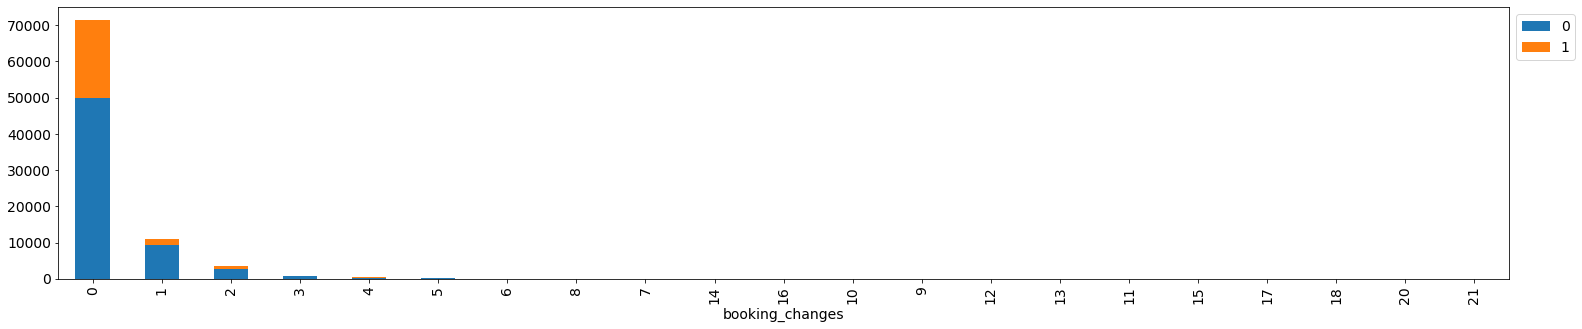

In [151]:
stacked_barplot(hotel1, "booking_changes", "is_canceled")

is_canceled       0      1    All
deposit_type                     
All           63349  24021  87370
No Deposit    63213  23012  86225
Non Refund       55    983   1038
Refundable       81     26    107
------------------------------------------------------------------------------------------------------------------------


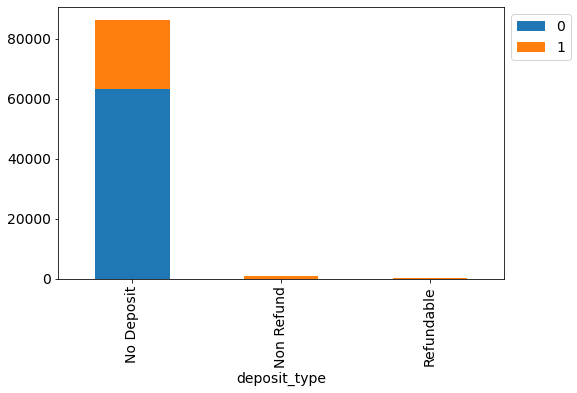

In [152]:
stacked_barplot(hotel1, "deposit_type", "is_canceled")

Mostly 

is_canceled          0      1    All
customer_type                       
All              63349  24021  87370
Transient        50299  21668  71967
Transient-Party   9933   1787  11720
Contract          2627    512   3139
Group              490     54    544
------------------------------------------------------------------------------------------------------------------------


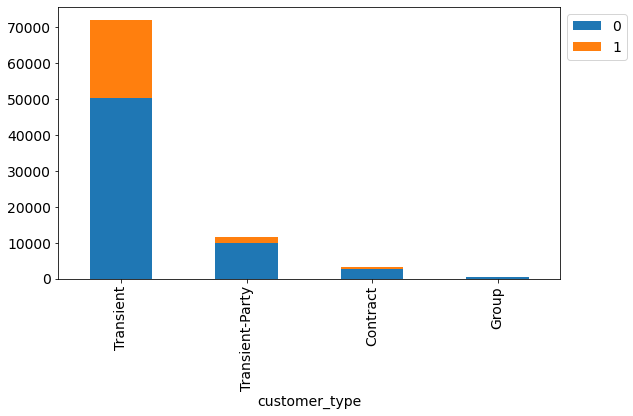

In [153]:
stacked_barplot(hotel1, "customer_type", "is_canceled")

Cancellations in case of Transient bookings are higher

is_canceled                      0      1    All
required_car_parking_spaces                     
0                            56036  24021  80057
All                          63349  24021  87370
1                             7280      0   7280
2                               28      0     28
3                                3      0      3
8                                2      0      2
------------------------------------------------------------------------------------------------------------------------


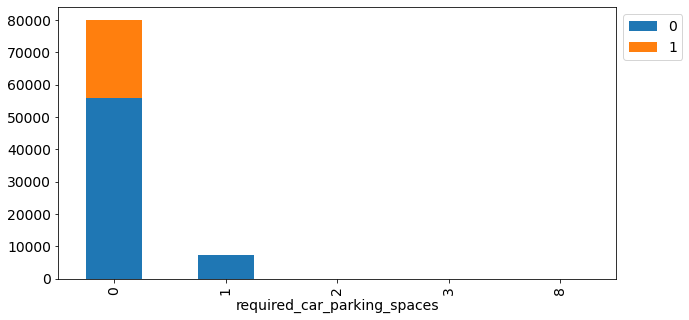

In [154]:
stacked_barplot(hotel1, "required_car_parking_spaces", "is_canceled")

Cancellations are only in the case where car parking space is not required

is_canceled                    0      1    All
total_of_special_requests                     
All                        63349  24021  87370
0                          29306  14571  43877
1                          22508   6502  29010
2                           9295   2515  11810
3                           1920    397   2317
4                            286     34    320
5                             34      2     36
------------------------------------------------------------------------------------------------------------------------


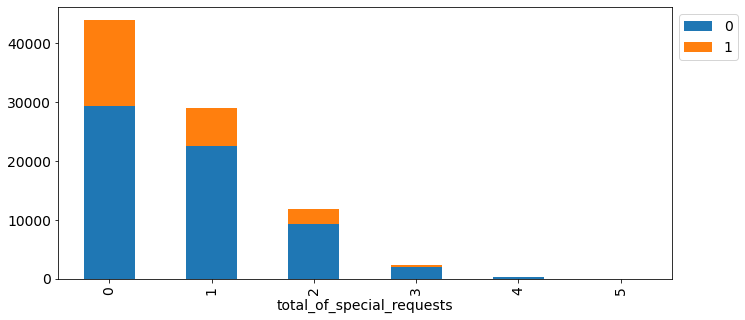

In [155]:
stacked_barplot(hotel1, "total_of_special_requests", "is_canceled")

1. As number of special requests rises chances of cancellation drops
2. Most of the bookings are without any special request

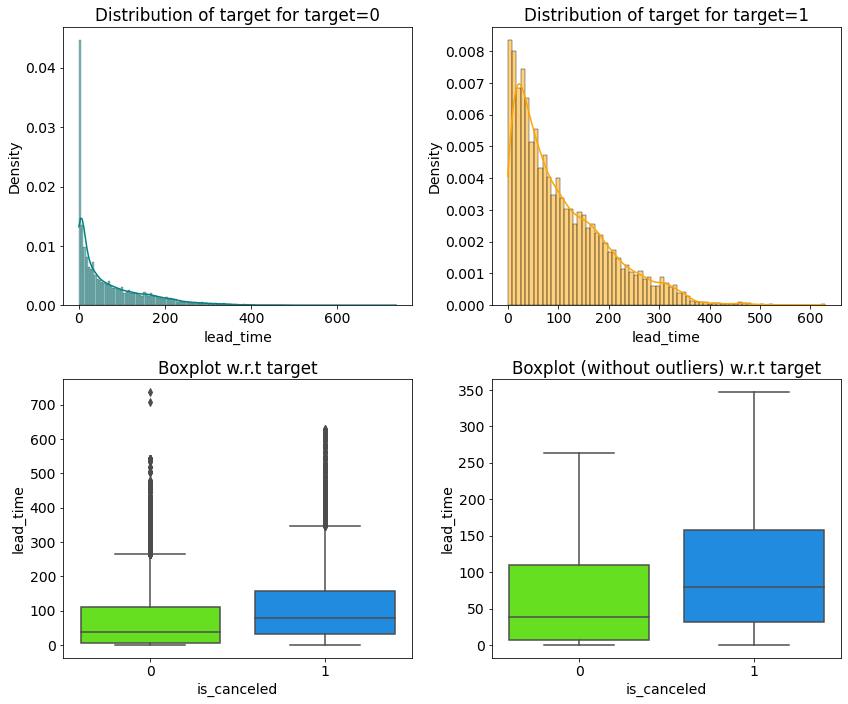

In [156]:
distribution_plot_wrt_target(hotel1, 'lead_time', 'is_canceled')

1. Distribution of both cancelled and no-cancelled are highly skewed to the right.
2. Median of lead_time in case of cancelled bookings is higher than not-cancelled bookings.
3. Most of the bookings in both cases has zero lead time which seems to be the case of same day arrival/cancellation at the hotel

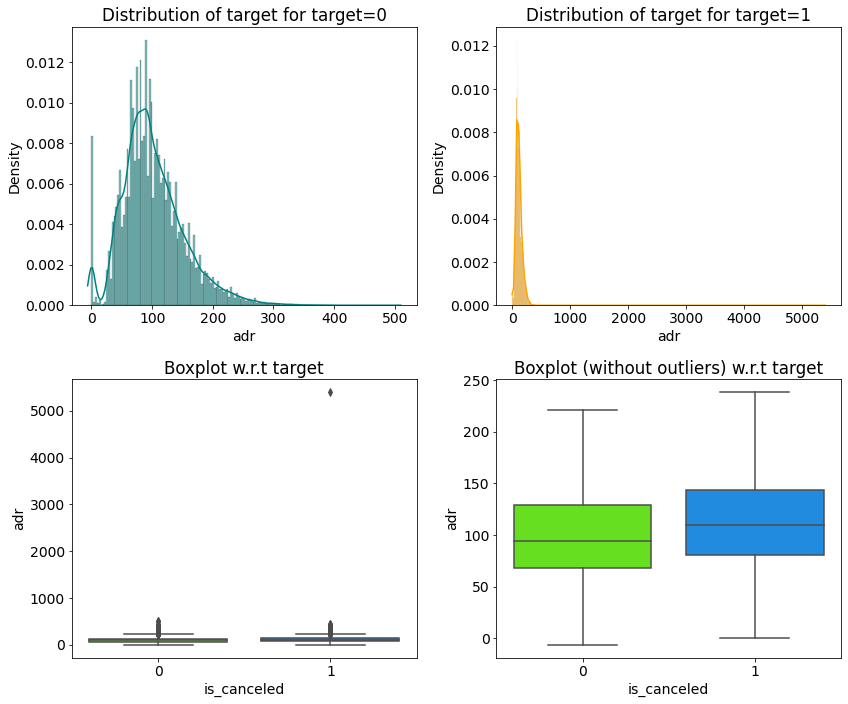

In [157]:
distribution_plot_wrt_target(hotel1, 'adr', 'is_canceled')

1. Median of Average Daily rate for cancelled booking is comparitively higher than median for not-cancelled booking.
2. Presence of large number of outliers in the average daily rate.
3. Average Daily rate is zero for some cases.It might be a case of complimentary bookings

is_canceled             0      1    All
assigned_room_type                     
All                 63349  24021  87370
A                   32114  14179  46293
D                   16998   5431  22429
E                    5496   1697   7193
F                    2732    894   3626
G                    1745    753   2498
B                    1421    399   1820
C                    1770    395   2165
H                     457    249    706
K                     264     12    276
P                       0      6      6
I                     352      5    357
L                       0      1      1
------------------------------------------------------------------------------------------------------------------------


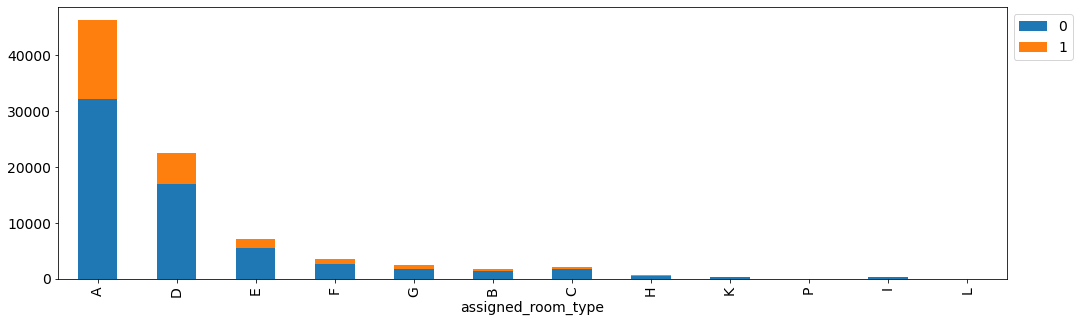

In [158]:
stacked_barplot(hotel1, "assigned_room_type", "is_canceled")

## Impute missing data

In [159]:
hotel.isna().sum().sort_values(ascending=False).head()

country                    452
children                     4
reservation_status_date      0
reservation_status           0
is_canceled                  0
dtype: int64

In [160]:
#creating copy of original data 
hotel2=hotel.copy()

### country

In [161]:
hotel2.country.mode()[0]

'PRT'

In [162]:
hotel2.country.value_counts()

PRT    27440
GBR    10431
FRA     8837
ESP     7250
DEU     5385
ITA     3065
IRL     3016
BEL     2081
BRA     1993
NLD     1911
USA     1875
CHE     1570
CN      1093
AUT      946
SWE      837
CHN      814
POL      765
RUS      561
NOR      514
ROU      458
FIN      422
ISR      403
DNK      384
AUS      378
AGO      342
LUX      262
MAR      232
TUR      213
ARG      203
HUN      202
JPN      183
IND      143
CZE      136
KOR      119
GRC      117
HRV       91
DZA       82
IRN       80
EST       79
ZAF       78
MEX       74
LTU       73
COL       69
BGR       68
CHL       65
NZL       63
UKR       62
MOZ       56
SRB       54
LVA       51
ARE       48
SVK       48
SAU       45
CYP       45
SVN       44
TWN       43
THA       40
TUN       37
SGP       34
PHL       32
EGY       31
NGA       30
URY       30
LBN       29
ISL       26
PER       26
ECU       25
IDN       25
BLR       24
MYS       24
HKG       23
CPV       23
VEN       21
KAZ       19
JOR       19
GEO       19
CRI       18

In [163]:
#Country has 452 missing values.Let's treat them with mode.
hotel2.country.fillna(hotel2.country.mode()[0],inplace=True)

### Children

In [164]:
hotel2.children.fillna(hotel2.children.mode()[0],inplace=True)

### meal

In [165]:
hotel2.meal.value_counts()

BB           67956
SC            9480
HB            9083
Undefined      492
FB             359
Name: meal, dtype: int64

In [166]:
hotel2.meal.mode()[0]

'BB'

In [167]:
hotel2.loc[hotel2.meal=='Undefined','meal']=hotel2.meal.mode()[0]

In [168]:
hotel2.meal.value_counts()

BB    68448
SC     9480
HB     9083
FB      359
Name: meal, dtype: int64

#### market_segment

In [169]:
hotel2.market_segment.value_counts()

Online TA        51609
Offline TA/TO    13881
Direct           11802
Groups            4941
Corporate         4206
Complementary      702
Aviation           227
Undefined            2
Name: market_segment, dtype: int64

Only 2 values are undefined. so we can replace it with the most frequent class i.e Online TA

In [170]:

hotel2.loc[hotel2.market_segment=='Undefined','market_segment']=hotel2.market_segment.mode()[0]

### Distribution Channel

In [171]:
hotel2.distribution_channel.value_counts()

TA/TO        69123
Direct       12986
Corporate     5075
GDS            181
Undefined        5
Name: distribution_channel, dtype: int64

In [172]:
hotel2.loc[hotel2.distribution_channel=='Undefined','distribution_channel']=hotel2.distribution_channel.mode()[0]

In [173]:
hotel2.market_segment.value_counts()

Online TA        51611
Offline TA/TO    13881
Direct           11802
Groups            4941
Corporate         4206
Complementary      702
Aviation           227
Name: market_segment, dtype: int64

In [174]:
hotel2.loc[hotel2['market_segment']=='Aviation','market_segment'].count()

227

In [175]:
l='Undefined'
for i in hotel2.columns:
    if l in hotel2[i]:
        print(hotel2.loc[hotel2[i]=='Undefined',i].count())
    else:
        print('not found')
        

not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found


All the standard and Non-Standard missing values has been treated.


In [176]:
hotel2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [177]:
catcol=['hotel', 'is_canceled', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date']

### arrival_date_month

We have considered arrival_date_month as categorical column.The number of categories are 12. so we'll reduce number of categories to reduce number of columns during dummy encoding


In [178]:
hotel2.arrival_date_month.replace(['January','February','March'],'Q1',inplace=True)
hotel2.arrival_date_month.replace(['April','May','June'],'Q2',inplace=True)
hotel2.arrival_date_month.replace(['July','August','September'],'Q3',inplace=True)
hotel2.arrival_date_month.replace(['October','November','December'],'Q4',inplace=True)

We have reduced categories by dividing the months into quarters

Now, we'll change the name of column 

In [179]:
hotel2.rename(columns={'arrival_date_month':'arrival_quarter'},inplace=True)

is_canceled          0      1    All
arrival_quarter                     
All              63349  24021  87370
Q3               19534   8461  27995
Q2               16819   7204  24023
Q1               14014   4283  18297
Q4               12982   4073  17055
------------------------------------------------------------------------------------------------------------------------


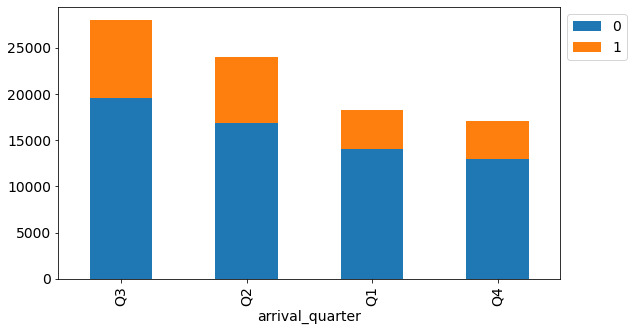

In [180]:
stacked_barplot(hotel2, 'arrival_quarter', 'is_canceled')

Q3 has the highest bookings as well as the highest cancellations followed by Q2

### country

In [181]:
hotel2.country.value_counts()/hotel2.shape[0]*100

PRT   31.92400
GBR   11.93888
FRA   10.11446
ESP    8.29804
DEU    6.16344
ITA    3.50807
IRL    3.45199
BEL    2.38182
BRA    2.28110
NLD    2.18725
USA    2.14605
CHE    1.79696
CN     1.25100
AUT    1.08275
SWE    0.95799
CHN    0.93167
POL    0.87559
RUS    0.64210
NOR    0.58830
ROU    0.52421
FIN    0.48300
ISR    0.46126
DNK    0.43951
AUS    0.43264
AGO    0.39144
LUX    0.29987
MAR    0.26554
TUR    0.24379
ARG    0.23235
HUN    0.23120
JPN    0.20945
IND    0.16367
CZE    0.15566
KOR    0.13620
GRC    0.13391
HRV    0.10415
DZA    0.09385
IRN    0.09156
EST    0.09042
ZAF    0.08928
MEX    0.08470
LTU    0.08355
COL    0.07897
BGR    0.07783
CHL    0.07440
NZL    0.07211
UKR    0.07096
MOZ    0.06410
SRB    0.06181
LVA    0.05837
ARE    0.05494
SVK    0.05494
SAU    0.05151
CYP    0.05151
SVN    0.05036
TWN    0.04922
THA    0.04578
TUN    0.04235
SGP    0.03891
PHL    0.03663
EGY    0.03548
NGA    0.03434
URY    0.03434
LBN    0.03319
ISL    0.02976
PER    0.02976
ECU    0.0

In [182]:
l=['PRT','GBR','FRA','ESP','DEU']
for i in hotel2.country:
    if i not in l:
        hotel2.country.replace(to_replace=i,value='OTHERS',inplace=True)
    else:
        continue

In [183]:
hotel2.country.value_counts()

PRT       27892
OTHERS    27575
GBR       10431
FRA        8837
ESP        7250
DEU        5385
Name: country, dtype: int64

### Market Segment

In [184]:
hotel2.market_segment.value_counts()

Online TA        51611
Offline TA/TO    13881
Direct           11802
Groups            4941
Corporate         4206
Complementary      702
Aviation           227
Name: market_segment, dtype: int64

is_canceled         0      1    All
market_segment                     
All             63349  24021  87370
Online TA       33365  18246  51611
Offline TA/TO   11821   2060  13881
Direct          10065   1737  11802
Groups           3606   1335   4941
Corporate        3696    510   4206
Complementary     614     88    702
Aviation          182     45    227
------------------------------------------------------------------------------------------------------------------------


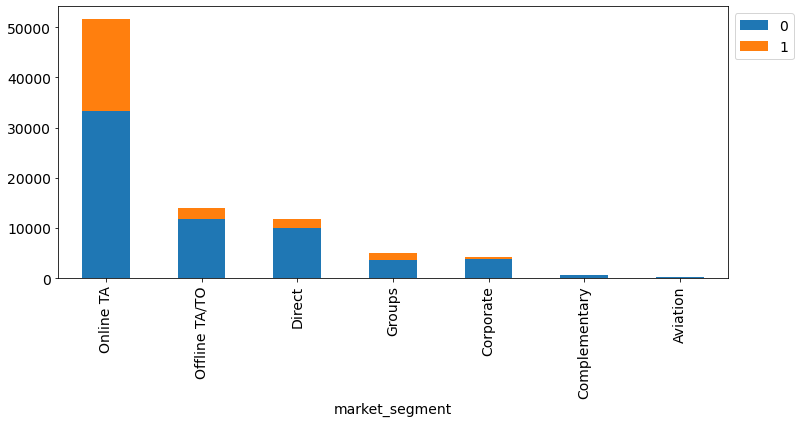

In [185]:
stacked_barplot(hotel2,'market_segment','is_canceled')

<AxesSubplot:xlabel='market_segment'>

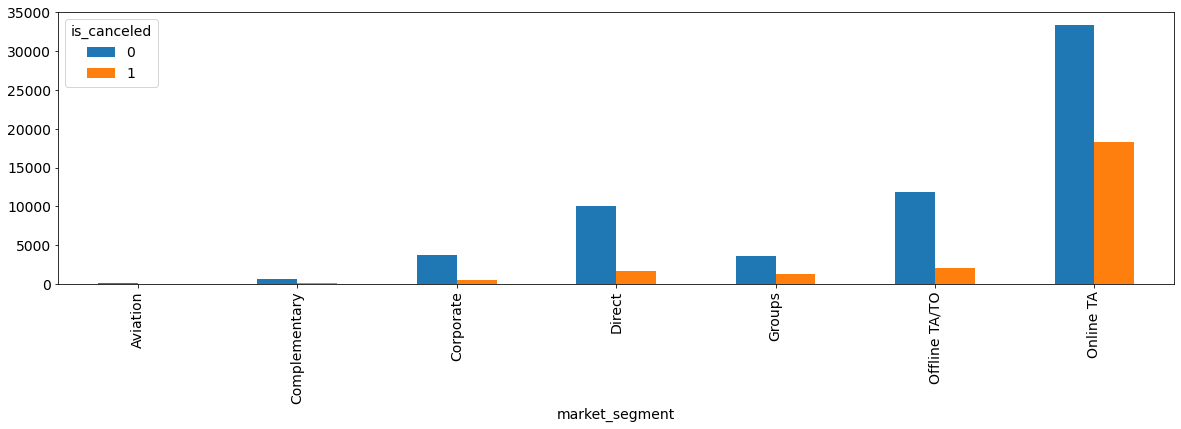

In [186]:
pd.crosstab(hotel2.market_segment,hotel2.is_canceled).plot(kind='bar')

In [187]:
hotel2.loc[(hotel2.market_segment=='Aviation')| (hotel2.market_segment=='Online TA') | (hotel2.market_segment=='Corporate'),'market_segment']='Online'
hotel2.loc[(hotel2.market_segment=='Offline TA/TO') | (hotel2.market_segment=='Direct') | (hotel2.market_segment=='Groups'),'market_segment']='Offline'
           

In [188]:
hotel2.market_segment.value_counts()

Online           56044
Offline          30624
Complementary      702
Name: market_segment, dtype: int64

### Distribution Channel

In [189]:
hotel2.distribution_channel.value_counts()

TA/TO        69128
Direct       12986
Corporate     5075
GDS            181
Name: distribution_channel, dtype: int64

is_canceled               0      1    All
distribution_channel                     
All                   63349  24021  87370
TA/TO                 47716  21412  69128
Direct                11061   1925  12986
Corporate              4427    648   5075
GDS                     145     36    181
------------------------------------------------------------------------------------------------------------------------


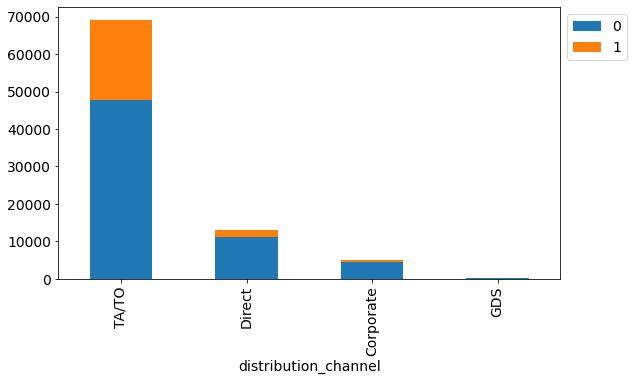

In [190]:
stacked_barplot(hotel2, "distribution_channel", "is_canceled")

distribution_channel and market_segment seems to provide similar information to the model. We'll pick either of them based on significance

### previous_cancellations

In [191]:
hotel2.previous_cancellations.value_counts()

0     85685
1      1407
2       112
3        61
4        30
11       27
5        19
6        17
13        4
25        2
24        2
26        1
21        1
19        1
14        1
Name: previous_cancellations, dtype: int64

####  we'll categorize it as 0 i.e there is no previous cancellation and 1 i.e there is previous cancellations

In [192]:
hotel2.loc[hotel2.previous_cancellations != 0 , 'previous_cancellations']= 1

In [193]:
hotel2.previous_cancellations.value_counts()

0    85685
1     1685
Name: previous_cancellations, dtype: int64

is_canceled                 0      1    All
previous_cancellations                     
All                     63349  24021  87370
0                       62808  22877  85685
1                         541   1144   1685
------------------------------------------------------------------------------------------------------------------------


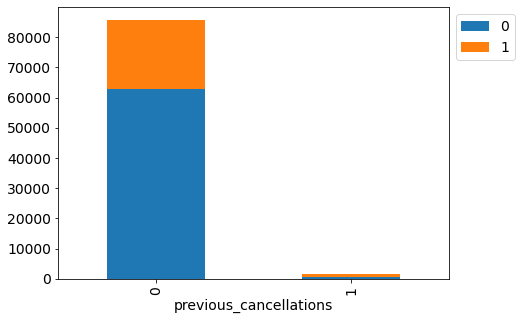

In [194]:
stacked_barplot(hotel2, 'previous_cancellations', 'is_canceled')

#### Renaming this feature

In [195]:
hotel2.rename(columns={'previous_cancellations':'is_previous_cancellations'},inplace=True)

### previous_bookings_not_canceled

#### Number of previous bookings not cancelled by the customer prior to the current booking.


In [196]:
hotel2.previous_bookings_not_canceled.value_counts()

0     83825
1      1482
2       580
3       331
4       228
5       181
6       114
7        87
8        70
9        59
10       52
11       42
12       37
13       30
14       28
15       21
16       20
17       16
18       14
19       13
20       12
21       12
25       10
22       10
24        9
27        9
23        7
26        7
28        7
29        6
30        4
44        2
48        2
31        2
32        2
58        2
57        1
70        1
55        1
56        1
69        1
71        1
54        1
59        1
68        1
67        1
53        1
66        1
60        1
65        1
61        1
64        1
72        1
37        1
52        1
41        1
35        1
34        1
33        1
62        1
38        1
39        1
40        1
42        1
51        1
43        1
45        1
46        1
47        1
36        1
49        1
50        1
63        1
Name: previous_bookings_not_canceled, dtype: int64

#### we'll categorize it as 0(there is no previous booking not cancelled by the customer prior to the current booking) 
#### and 1(there is previous booking not cancelled by the customer prior to the current booking)

In [197]:
hotel2.loc[hotel2.previous_bookings_not_canceled != 0,'previous_bookings_not_canceled']=1
#Now, renaming column
hotel2.rename(columns={'previous_bookings_not_canceled':'is_previous_bookings_not_canceled'},inplace=True)

### booking_changes

#### Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.

In [198]:
hotel2.booking_changes.value_counts()

0     71470
1     10900
2      3508
3       875
4       356
5       116
6        59
7        31
8        17
9         8
10        6
13        5
14        5
15        3
11        2
12        2
16        2
17        2
20        1
18        1
21        1
Name: booking_changes, dtype: int64

#### We'll categorize as 0 and 1
#### 0: no booking changes
#### 1: booking changes exist

In [199]:
hotel2.loc[hotel2.booking_changes != 0 ,'booking_changes']=1
hotel2.rename(columns={'booking_changes':'is_booking_changes'},inplace=True)

is_canceled             0      1    All
is_booking_changes                     
All                 63349  24021  87370
0                   49906  21564  71470
1                   13443   2457  15900
------------------------------------------------------------------------------------------------------------------------


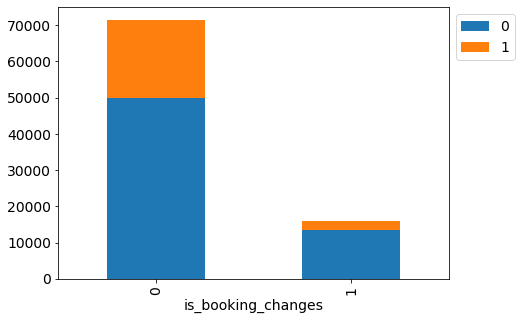

In [200]:
stacked_barplot(hotel2, 'is_booking_changes', 'is_canceled')

Most of the visitors has not made any booking changes



### days_in_waiting_list

#### Number of days the booking was in the waiting list before it was confirmed to the customer.

In [201]:
hotel2.days_in_waiting_list.value_counts()

0      86510
63        53
87        25
44        23
15        22
48        21
122       21
58        21
38        19
27        17
77        17
34        15
4         15
147       14
50        14
101       13
59        13
98        13
178       12
31        12
1         12
56        11
176       11
223       10
99        10
25        10
17        10
69        10
43        10
125       10
60        10
187       10
46         9
61         9
14         9
6          9
39         9
259        9
5          8
40         8
49         8
96         8
111        8
68         7
33         7
20         7
22         7
28         7
108        7
236        7
71         7
65         7
75         7
162        7
8          7
11         7
35         7
80         6
150        6
113        6
224        5
107        5
21         5
2          5
41         5
207        5
174        5
391        5
53         5
9          5
10         4
13         4
16         4
215        4
330        4
7          4
47         4

#### We'll categorize it as 0 and 1
#### 0: no days in waiting list
#### 1: days in waiting list exist

In [202]:
hotel2.loc[hotel2.days_in_waiting_list != 0,'days_in_waiting_list']=1
hotel2.rename(columns={'days_in_waiting_list':'is_days_in_waiting_list'},inplace=True)

### required_car_parking_spaces

#### Number of car parking spaces required by the customer

In [203]:
hotel2.required_car_parking_spaces.value_counts()

0    80057
1     7280
2       28
3        3
8        2
Name: required_car_parking_spaces, dtype: int64

#### We'll categorize it as 0 and 1
#### 0: parking space not required
#### 1: parking space required

In [204]:
hotel2.loc[hotel2.required_car_parking_spaces != 0, 'required_car_parking_spaces']=1
hotel2.rename(columns={'required_car_parking_spaces':'is_car_parking_spaces_required'},inplace=True)

is_canceled                         0      1    All
is_car_parking_spaces_required                     
0                               56036  24021  80057
All                             63349  24021  87370
1                                7313      0   7313
------------------------------------------------------------------------------------------------------------------------


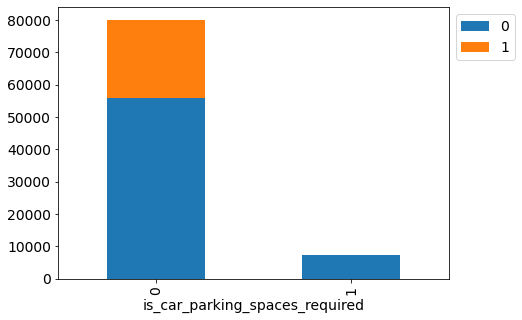

In [205]:
stacked_barplot(hotel2,'is_car_parking_spaces_required', 'is_canceled')

There is no cancellation if visitor required car_parking_spaces

### total_of_special_requests

#### Number of special requests made by the customer (e.g. twin bed or high floor)

In [206]:
hotel2.total_of_special_requests.value_counts()

0    43877
1    29010
2    11810
3     2317
4      320
5       36
Name: total_of_special_requests, dtype: int64

is_canceled                    0      1    All
total_of_special_requests                     
All                        63349  24021  87370
0                          29306  14571  43877
1                          22508   6502  29010
2                           9295   2515  11810
3                           1920    397   2317
4                            286     34    320
5                             34      2     36
------------------------------------------------------------------------------------------------------------------------


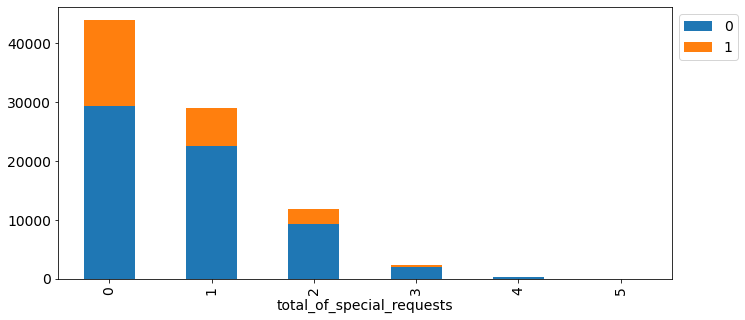

In [207]:
stacked_barplot(hotel2,'total_of_special_requests', 'is_canceled')

#### We'll categorize as 0 and 1
#### 0: No special request
#### 1: Special request exist

In [208]:
hotel2.loc[hotel2.total_of_special_requests != 0,'total_of_special_requests']=1
hotel2.rename(columns={'total_of_special_requests':'is_any_special_requests'},inplace=True)

In [209]:
hotel2.is_any_special_requests.value_counts()

0    43877
1    43493
Name: is_any_special_requests, dtype: int64

is_canceled                  0      1    All
is_any_special_requests                     
All                      63349  24021  87370
0                        29306  14571  43877
1                        34043   9450  43493
------------------------------------------------------------------------------------------------------------------------


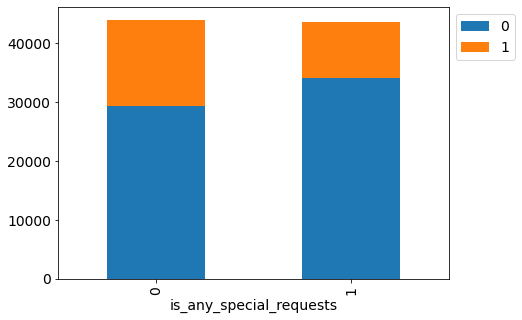

In [210]:
stacked_barplot(hotel2, "is_any_special_requests", "is_canceled")

In [211]:
hotel2.is_any_special_requests.value_counts()/hotel2.shape[0]*100

0   50.21976
1   49.78024
Name: is_any_special_requests, dtype: float64

1. Both the cases has around equal number of instances
2. Cancellations in case of no special requests is comparitively higher

### Dropping unnecessary features

In [212]:
hotel2.drop(['arrival_date_week_number','arrival_date_day_of_month','reservation_status','reservation_status_date'],axis=1,inplace=True)

## Deriving new features

#### Total_nights

We'll derive new column 'Total_nights' which would be stays_in_weekend_nights + stays_in_week_nights

In [213]:
hotel2['Total_nights']=hotel2['stays_in_weekend_nights']+hotel2['stays_in_week_nights']
hotel2.drop(['stays_in_weekend_nights','stays_in_week_nights'],axis=1,inplace=True)

In [214]:
hotel2.Total_nights.max()

69

In [215]:
hotel2['Total_nights']=hotel2.Total_nights.astype(int)

In [216]:
hotel2.Total_nights.dtype

dtype('int32')

In [217]:
hotel2.Total_nights.value_counts()

3     17836
1     17171
2     15743
4     13570
7      7526
5      6740
6      3271
10     1076
8      1067
14      862
9       780
0       651
11      370
12      199
13      134
15       72
21       55
28       35
16       33
18       24
19       22
17       20
25       14
29       14
20       14
30       13
22       13
26        6
24        6
27        5
35        5
23        5
42        4
33        2
56        2
34        1
38        1
57        1
43        1
69        1
45        1
46        1
48        1
49        1
60        1
Name: Total_nights, dtype: int64

In [218]:
hotel2['Duration_type'] = ''

In [219]:
hotel2.loc[(hotel2.Total_nights >= 0) & (hotel2.Total_nights < 3 ), 'Duration_type']='Short'
hotel2.loc[(hotel2.Total_nights >= 3) & (hotel2.Total_nights <= 7 ), 'Duration_type']='Long'
hotel2.loc[(hotel2.Total_nights > 7) & (hotel2.Total_nights <= hotel2.Total_nights.max()), 'Duration_type']='Extended'

In [220]:
hotel2.drop('Total_nights',axis=1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_quarter,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,is_previous_cancellations,is_previous_bookings_not_canceled,reserved_room_type,assigned_room_type,is_booking_changes,deposit_type,is_days_in_waiting_list,customer_type,adr,is_car_parking_spaces_required,is_any_special_requests,Duration_type
0,Resort Hotel,0,342,2015,Q3,2,0.00000,0,BB,PRT,Offline,Direct,0,0,0,C,C,1,No Deposit,0,Transient,0.00000,0,0,Short
1,Resort Hotel,0,737,2015,Q3,2,0.00000,0,BB,PRT,Offline,Direct,0,0,0,C,C,1,No Deposit,0,Transient,0.00000,0,0,Short
2,Resort Hotel,0,7,2015,Q3,1,0.00000,0,BB,GBR,Offline,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00000,0,0,Short
3,Resort Hotel,0,13,2015,Q3,1,0.00000,0,BB,GBR,Online,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00000,0,0,Short
4,Resort Hotel,0,14,2015,Q3,2,0.00000,0,BB,GBR,Online,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00000,0,1,Short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,Q3,2,0.00000,0,BB,OTHERS,Offline,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14000,0,0,Long
119386,City Hotel,0,102,2017,Q3,3,0.00000,0,BB,FRA,Online,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43000,0,1,Long
119387,City Hotel,0,34,2017,Q3,2,0.00000,0,BB,DEU,Online,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71000,0,1,Long
119388,City Hotel,0,109,2017,Q3,2,0.00000,0,BB,GBR,Online,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40000,0,0,Long


#### Total_Visitors

In [221]:
hotel2['Total_Visitors']=hotel2['adults']+hotel2['children']+hotel2['babies']
hotel2.drop(['adults','children','babies'],axis=1,inplace=True)

In [222]:
hotel2.Total_Visitors.value_counts()

2.00000     57043
1.00000     16062
3.00000     10076
4.00000      3870
0.00000       166
5.00000       136
26.00000        5
27.00000        2
12.00000        2
10.00000        2
20.00000        2
55.00000        1
6.00000         1
50.00000        1
40.00000        1
Name: Total_Visitors, dtype: int64

In [223]:
hotel2[hotel2.Total_Visitors==0].shape

(166, 24)

We'll categorize Total no of visitors as Single,Couple,Family and Groups

In [224]:
hotel2.loc[hotel2.Total_Visitors==1,'Total_Visitors']='Single'
hotel2.loc[hotel2.Total_Visitors==2,'Total_Visitors']='Couple'
hotel2.loc[(hotel2.Total_Visitors==3) | (hotel2.Total_Visitors==4) | (hotel2.Total_Visitors==5) | (hotel2.Total_Visitors==6) ,'Total_Visitors']='Family'
hotel2.loc[(hotel2.Total_Visitors == 26) | (hotel2.Total_Visitors == 12) | (hotel2.Total_Visitors == 27) | 
           (hotel2.Total_Visitors == 20) | (hotel2.Total_Visitors == 10) | (hotel2.Total_Visitors == 40) | 
           (hotel2.Total_Visitors == 50) | (hotel2.Total_Visitors == 55) ,'Total_Visitors']='Groups'
#Total number of visitors should not ideally be zero. So, We'll drop those rows where number of visitors are Zero.
hotel2.drop(hotel2[hotel2.Total_Visitors==0].index,inplace=True)

In [225]:
hotel2.rename(columns={'Total_Visitors':'Visitor_type'},inplace=True)

In [226]:
hotel2.Visitor_type.value_counts()

Couple    57043
Single    16062
Family    14083
Groups       16
Name: Visitor_type, dtype: int64

In [227]:
hotel2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87204 entries, 0 to 119389
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   hotel                              87204 non-null  object 
 1   is_canceled                        87204 non-null  int64  
 2   lead_time                          87204 non-null  int64  
 3   arrival_date_year                  87204 non-null  int64  
 4   arrival_quarter                    87204 non-null  object 
 5   meal                               87204 non-null  object 
 6   country                            87204 non-null  object 
 7   market_segment                     87204 non-null  object 
 8   distribution_channel               87204 non-null  object 
 9   is_repeated_guest                  87204 non-null  int64  
 10  is_previous_cancellations          87204 non-null  int64  
 11  is_previous_bookings_not_canceled  87204 non-null  in

## Chi-square Test

In [228]:
cat_cols=hotel2.drop(['lead_time','adr'],axis=1)

In [229]:
cat_cols['none']=''

In [230]:
cat_cols.head()

,hotel,is_canceled,arrival_date_year,arrival_quarter,meal,country,market_segment,distribution_channel,is_repeated_guest,is_previous_cancellations,is_previous_bookings_not_canceled,reserved_room_type,assigned_room_type,is_booking_changes,deposit_type,is_days_in_waiting_list,customer_type,is_car_parking_spaces_required,is_any_special_requests,Total_nights,Duration_type,Visitor_type,none
0,Resort Hotel,0,2015,Q3,BB,PRT,Offline,Direct,0,0,0,C,C,1,No Deposit,0,Transient,0,0,0,Short,Couple,
1,Resort Hotel,0,2015,Q3,BB,PRT,Offline,Direct,0,0,0,C,C,1,No Deposit,0,Transient,0,0,0,Short,Couple,
2,Resort Hotel,0,2015,Q3,BB,GBR,Offline,Direct,0,0,0,A,C,0,No Deposit,0,Transient,0,0,1,Short,Single,
3,Resort Hotel,0,2015,Q3,BB,GBR,Online,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,0,0,1,Short,Single,
4,Resort Hotel,0,2015,Q3,BB,GBR,Online,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,0,1,2,Short,Couple,


In [275]:
cat_cols.shape

(87204, 55)

In [309]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
sig_cat_cols = []
insig_cat_cols = []

for i in cat_cols:
    print(f"H0 : {i} and Is_canceled are independent \nH1 : {i} and Is_canceled are dependent\n")
    ct = pd.crosstab(hotel2.is_canceled, cat_cols[i], margins = True)
    print(ct, end='\n\n')
    obs = np.array([ct.iloc[0][0:5].values, ct.iloc[1][0:5].values])
    print(stats.chi2_contingency(obs)[0:3])
    sig = 0.05
    if sig>stats.chi2_contingency(obs)[0:3][1]:
        print(f'As the P Value : {stats.chi2_contingency(obs)[0:3][1]} < Significance Level : {sig}, we reject the null hypothesis ')
        print(f'{i} is Significant', end='\n\n\n\n')
        sig_cat_cols.append(i)
    else:
        print(f'As the P Value : {stats.chi2_contingency(obs)[0:3][1]} >= Significance Level {sig}, we are unable to reject the null hypothesis ')
        print(f'{i} is Insignificant', end='\n\n\n\n')
        insig_cat_cols.append(i)

H0 : is_canceled and Is_canceled are independent 
H1 : is_canceled and Is_canceled are dependent

is_canceled      0      1    All
is_canceled                     
0            63199      0  63199
1                0  24005  24005
All          63199  24005  87204

(87204.00000000001, 0.0, 2)
As the P Value : 0.0 < Significance Level : 0.05, we reject the null hypothesis 
is_canceled is Significant



H0 : arrival_date_year and Is_canceled are independent 
H1 : arrival_date_year and Is_canceled are dependent

arrival_date_year   2015   2016   2017    All
is_canceled                                  
0                  10577  31104  21518  63199
1                   2701  11199  10105  24005
All                13278  42303  31623  87204

(677.8873412389028, 1.3085557935705007e-146, 3)
As the P Value : 1.3085557935705007e-146 < Significance Level : 0.05, we reject the null hypothesis 
arrival_date_year is Significant



H0 : is_repeated_guest and Is_canceled are independent 
H1 : is_repeate

In [319]:
#Alternative ways

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
sig_cat_cols = []
insig_cat_cols = []

for i in cat_cols:
    #print(f"H0 : {i} and Is_canceled are independent \nH1 : {i} and Is_canceled are dependent\n")
    ct = pd.crosstab(hotel2.is_canceled, cat_cols[i], margins = True)
    observed_value = ct.values
    observed_value    

In [320]:
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 54), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 72.1532


In [321]:
#i.e.if the chi-square value is greater than 32.6706 then we reject the null hypothesis.

In [322]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

In [323]:
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 674.0767314466594
p-value: 1.4291031288833926e-144
Degrees of freedom: 4
Expected values: [[51558.45211229 11640.54788771 63199.        ]
 [19583.54788771  4421.45211229 24005.        ]
 [71142.         16062.         87204.        ]]


The above output shows that the chi-square test statistic is greater than 32.6706 and the p-value is less than 0.05, 
thus we reject the null hypothesis and conclude that the variables is_canceled and cat_col are dependent.

In [324]:
sig_cat_cols

[]

In [325]:
insig_cat_cols

[]

## ANOVA Test

In [235]:
num=hotel2[['lead_time','adr','Total_nights']]

In [236]:
Anova_df = pd.DataFrame(columns=['Feature', 'Pval', 'Dependent'])

for i in list(num):
    x = hotel2.groupby('is_canceled')[i].apply(list)
    res = stats.f_oneway(*x)
    pval = res[1]
    
    if pval < 0.05:
        dependent = 'Yes'
    else:
        dependent = 'No'
        
    Anova_df.loc[i] = [i, pval, dependent]
    
Anova_df.reset_index(inplace=True)

In [237]:
an=Anova_df.drop('index',axis=1)
an

,Feature,Pval,Dependent
0,lead_time,0.00000,Yes
1,adr,0.00000,Yes
2,Total_nights,0.00000,Yes


#### In full model, we'll use all the features without checking their significance

In [238]:
hotell=hotel2.copy()

In [239]:
hotell

,hotel,is_canceled,lead_time,arrival_date_year,arrival_quarter,meal,country,market_segment,distribution_channel,is_repeated_guest,is_previous_cancellations,is_previous_bookings_not_canceled,reserved_room_type,assigned_room_type,is_booking_changes,deposit_type,is_days_in_waiting_list,customer_type,adr,is_car_parking_spaces_required,is_any_special_requests,Total_nights,Duration_type,Visitor_type
0,Resort Hotel,0,342,2015,Q3,BB,PRT,Offline,Direct,0,0,0,C,C,1,No Deposit,0,Transient,0.00000,0,0,0,Short,Couple
1,Resort Hotel,0,737,2015,Q3,BB,PRT,Offline,Direct,0,0,0,C,C,1,No Deposit,0,Transient,0.00000,0,0,0,Short,Couple
2,Resort Hotel,0,7,2015,Q3,BB,GBR,Offline,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00000,0,0,1,Short,Single
3,Resort Hotel,0,13,2015,Q3,BB,GBR,Online,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00000,0,0,1,Short,Single
4,Resort Hotel,0,14,2015,Q3,BB,GBR,Online,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00000,0,1,2,Short,Couple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,Q3,BB,OTHERS,Offline,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14000,0,0,7,Long,Couple
119386,City Hotel,0,102,2017,Q3,BB,FRA,Online,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43000,0,1,7,Long,Family
119387,City Hotel,0,34,2017,Q3,BB,DEU,Online,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71000,0,1,7,Long,Couple
119388,City Hotel,0,109,2017,Q3,BB,GBR,Online,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40000,0,0,7,Long,Couple


### Data Preparation for Modelling

Dummy encode categorical variables

In [240]:
cat_cols1=hotell.drop(['lead_time','adr','is_canceled'],axis=1)

In [241]:
cat_cols1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87204 entries, 0 to 119389
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   hotel                              87204 non-null  object
 1   arrival_date_year                  87204 non-null  int64 
 2   arrival_quarter                    87204 non-null  object
 3   meal                               87204 non-null  object
 4   country                            87204 non-null  object
 5   market_segment                     87204 non-null  object
 6   distribution_channel               87204 non-null  object
 7   is_repeated_guest                  87204 non-null  int64 
 8   is_previous_cancellations          87204 non-null  int64 
 9   is_previous_bookings_not_canceled  87204 non-null  int64 
 10  reserved_room_type                 87204 non-null  object
 11  assigned_room_type                 87204 non-null  object
 12  is_

In [242]:
cat_cols1['is_repeated_guest']=cat_cols1.is_repeated_guest.astype('object')
cat_cols1['is_previous_cancellations']=cat_cols1.is_previous_cancellations.astype('object')
cat_cols1['is_previous_bookings_not_canceled']=cat_cols1.is_previous_bookings_not_canceled.astype('object')
cat_cols1['is_booking_changes']=cat_cols1.is_booking_changes.astype('object')
cat_cols1['is_days_in_waiting_list']=cat_cols1.is_days_in_waiting_list.astype('object')
cat_cols1['is_car_parking_spaces_required']=cat_cols1.is_car_parking_spaces_required.astype('object')
cat_cols1['is_any_special_requests']=cat_cols1.is_any_special_requests.astype('object')


In [243]:
cat_cols1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87204 entries, 0 to 119389
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   hotel                              87204 non-null  object
 1   arrival_date_year                  87204 non-null  int64 
 2   arrival_quarter                    87204 non-null  object
 3   meal                               87204 non-null  object
 4   country                            87204 non-null  object
 5   market_segment                     87204 non-null  object
 6   distribution_channel               87204 non-null  object
 7   is_repeated_guest                  87204 non-null  object
 8   is_previous_cancellations          87204 non-null  object
 9   is_previous_bookings_not_canceled  87204 non-null  object
 10  reserved_room_type                 87204 non-null  object
 11  assigned_room_type                 87204 non-null  object
 12  is_

In [244]:
cat_cols=pd.get_dummies(cat_cols,drop_first=True)

In [245]:
cat_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87204 entries, 0 to 119389
Data columns (total 55 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   is_canceled                        87204 non-null  int64
 1   arrival_date_year                  87204 non-null  int64
 2   is_repeated_guest                  87204 non-null  int64
 3   is_previous_cancellations          87204 non-null  int64
 4   is_previous_bookings_not_canceled  87204 non-null  int64
 5   is_booking_changes                 87204 non-null  int64
 6   is_days_in_waiting_list            87204 non-null  int64
 7   is_car_parking_spaces_required     87204 non-null  int64
 8   is_any_special_requests            87204 non-null  int64
 9   Total_nights                       87204 non-null  int32
 10  hotel_Resort Hotel                 87204 non-null  uint8
 11  arrival_quarter_Q2                 87204 non-null  uint8
 12  arrival_quarter_Q

Let's identify numerical columns

In [246]:
num=hotell[['lead_time','adr'
           ,'Total_nights'
           ]]

In [247]:
num

,lead_time,adr,Total_nights
0,342,0.00000,0
1,737,0.00000,0
2,7,75.00000,1
3,13,75.00000,1
4,14,98.00000,2
...,...,...,...
119385,23,96.14000,7
119386,102,225.43000,7
119387,34,157.71000,7
119388,109,104.40000,7


In [248]:
num.info() #num needs to be scaled

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87204 entries, 0 to 119389
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lead_time     87204 non-null  int64  
 1   adr           87204 non-null  float64
 2   Total_nights  87204 non-null  int32  
dtypes: float64(1), int32(1), int64(1)
memory usage: 2.3 MB


lead_time and adr are highly skewed. we'll not transform them because OLS method is not used here


we'll scale the numeric data

In [249]:
scale=StandardScaler()
num1=scale.fit_transform(num)
num=pd.DataFrame(num1,columns=['lead_time','adr','Total_nights'])

In [250]:
cat_cols.shape

(87204, 55)

In [251]:
num.shape

(87204, 3)

In [252]:
X = pd.concat([cat_cols.reset_index(drop=True),num.reset_index(drop=True)], axis=1).drop('is_canceled', axis = 1)

In [253]:
X

,arrival_date_year,is_repeated_guest,is_previous_cancellations,is_previous_bookings_not_canceled,is_booking_changes,is_days_in_waiting_list,is_car_parking_spaces_required,is_any_special_requests,Total_nights,hotel_Resort Hotel,arrival_quarter_Q2,arrival_quarter_Q3,arrival_quarter_Q4,meal_FB,meal_HB,meal_SC,country_ESP,country_FRA,country_GBR,country_OTHERS,country_PRT,market_segment_Offline,market_segment_Online,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,Duration_type_Long,Duration_type_Short,Visitor_type_Family,Visitor_type_Groups,Visitor_type_Single,lead_time,adr,Total_nights
0,2015,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,3.04458,-1.94057,-1.32291
1,2015,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,7.63435,-1.94057,-1.32291
2,2015,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,-0.84801,-0.57428,-0.95836
3,2015,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,-0.77829,-0.57428,-0.95836
4,2015,0,0,0,0,0,0,1,2,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,-0.76667,-0.15528,-0.59381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87199,2017,0,0,0,0,0,0,0,7,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,-0.66209,-0.18917,1.22894
87200,2017,0,0,0,0,0,0,1,7,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0.25586,2.16614,1.22894
87201,2017,0,0,0,0,0,0,1,7,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,-0.53428,0.93247,1.22894
87202,2017,0,0,0,0,0,0,0,7,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0.33720,-0.03869,1.22894


In [254]:
y=hotell.is_canceled

### Splitting data into training and testing set

In [255]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

### Logistic Regression Model

In [256]:
log_model = LogisticRegression(solver = 'saga', penalty = 'l1', random_state = 2 )

In [257]:
log_model.fit(x_train,y_train)

LogisticRegression(penalty='l1', random_state=2, solver='saga')

In [258]:
# Intercept for the Linear model
log_model.intercept_

array([-3.35161183e-05])

In [259]:
log_model.coef_
# Coefficients of the variables

array([[-5.92522374e-04, -1.81994228e-02,  2.28585807e-02,
        -2.26993041e-02, -6.29630602e-02,  1.89762479e-03,
        -6.43092950e-02, -9.15922683e-02,  4.08484412e-02,
        -4.84278405e-02,  1.49953669e-02,  8.30448228e-03,
        -1.16725850e-02, -5.44316462e-04, -8.52320953e-03,
         2.63507453e-02, -3.54005363e-03, -2.36631309e-02,
        -3.69492804e-02, -4.44272491e-03,  8.55231827e-02,
        -9.89269710e-02,  1.01093736e-01, -4.30702978e-02,
        -1.93425420e-04,  6.29115900e-02,  1.57076738e-03,
         7.48375325e-04,  9.06076032e-03, -2.33272073e-03,
         1.23627027e-03,  3.49969177e-03,  2.00638535e-03,
         0.00000000e+00, -2.52377287e-03, -7.18956755e-03,
        -2.49281965e-02, -1.05232106e-02, -4.69209243e-03,
         1.39026802e-04,  1.31674306e-03, -2.69423522e-03,
        -1.07857595e-03,  0.00000000e+00,  2.31688509e-02,
        -3.81920243e-05, -2.60664902e-03,  5.90430897e-02,
        -4.22989391e-02,  2.98584614e-02, -2.70517991e-0

In [260]:
print('Training Score',log_model.score(x_train,y_train))
print('Testing Score',log_model.score(x_test,y_test))


Training Score 0.7253530356148226
Testing Score 0.7275055423897255


In [261]:
print(classification_report(y_test, log_model.predict(x_test)))


              precision    recall  f1-score   support

           0       0.73      1.00      0.84     18998
           1       0.77      0.01      0.01      7164

    accuracy                           0.73     26162
   macro avg       0.75      0.50      0.43     26162
weighted avg       0.74      0.73      0.62     26162



In [262]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [263]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(x_train, y_train)

In [264]:
# print the performance measures
print(classification_report(y_test, decision_tree.predict(x_test)))


              precision    recall  f1-score   support

           0       0.85      0.85      0.85     18998
           1       0.60      0.62      0.61      7164

    accuracy                           0.78     26162
   macro avg       0.73      0.73      0.73     26162
weighted avg       0.79      0.78      0.78     26162



In [265]:
print('Training Score',decision_tree.score(x_train,y_train))
print('Testing Score',decision_tree.score(x_test,y_test))


Training Score 0.9962157203237115
Testing Score 0.784076140967816


In [266]:
#since difference between training score and  test score is more  so model is seems to be overfit, 
#we we do hyper parameter tunning 

In [267]:
dt_model = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 5,
                                  min_samples_split = 4,
                                  max_leaf_nodes = 6,
                                  random_state = 10)

# fit the model using fit() on train data
decision_tree = dt_model.fit(x_train, y_train)
print(classification_report(y_test, decision_tree.predict(x_test)))

print('Training Score',decision_tree.score(x_train,y_train))
print('Testing Score',decision_tree.score(x_test,y_test))




              precision    recall  f1-score   support

           0       0.86      0.81      0.83     18998
           1       0.56      0.65      0.60      7164

    accuracy                           0.77     26162
   macro avg       0.71      0.73      0.72     26162
weighted avg       0.78      0.77      0.77     26162

Training Score 0.7655384817011238
Testing Score 0.7653084626557602


In [268]:
from sklearn.model_selection import GridSearchCV

tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]

decision_tree_classification = DecisionTreeClassifier(random_state = 10)

tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

tree_grid_model = tree_grid.fit(x_train, y_train)

print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

KeyboardInterrupt: 

In [ ]:
dt_model = DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),
                                  max_features = tree_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)


dt_model = dt_model.fit(x_train, y_train)

In [ ]:
# create a generalized function to calculate the metrics values for train set
def get_train_report(model):
    train_pred = model.predict(x_train)
    return(classification_report(y_train, train_pred))

In [ ]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    test_pred =model.predict(x_test)
    return(classification_report(y_test, test_pred))

In [ ]:
print('Classification Report for train set: \n', get_train_report(dt_model))
print('Classification Report for test set: \n', get_test_report(dt_model))

In [ ]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)


rf_model = rf_classification.fit(x_train, y_train)

In [ ]:
print(classification_report(y_test, rf_model.predict(x_test)))


In [ ]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]
 

random_forest_classification = RandomForestClassifier(random_state = 10)

rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

rf_grid_model = rf_grid.fit(x_train, y_train)

print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

In [ ]:
rf_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

rf_model = rf_model.fit(x_train, y_train)


print('Classification Report for test set:\n', get_test_report(rf_model))

In [ ]:
plt.rcParams['figure.figsize']=[40,45]
important_features = pd.DataFrame({'Features': x_train.columns, 
                                   'Importance': rf_model.feature_importances_})


important_features = important_features.sort_values('Importance', ascending = False)


sns.barplot(x = 'Importance', y = 'Features', data = important_features)


plt.title('Feature Importance', fontsize = 25)
plt.xlabel('Importance', fontsize = 75)
plt.ylabel('Features', fontsize = 45)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)


plt.tight_layout()
plt.show()